<a href="https://colab.research.google.com/github/fsdfsd123/DM2020-Lab1-Master/blob/master/109062470_feng_shao_di_DM2020_Lab1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Information
Name:馮少迪

Student ID:109062470

GitHub ID:fsdfsd123

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
!git clone https://github.com/fsdfsd123/datamininghelper.git
!unzip datamininghelper/helpers.zip

Cloning into 'datamininghelper'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
Archive:  datamininghelper/helpers.zip
   creating: helpers/
  inflating: helpers/data_mining_helpers.py  
  inflating: helpers/text_analysis.py  
  inflating: helpers/__init__.py     


# first

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
# import sys
# sys.path.append('/content/datamininghelper')

In [4]:
import pandas as pd

# my functions
#import helpers.data_mining_helpers as dmh
from helpers import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here
TEST = X
TEST[['text','category']] = TEST[['category','text']]
print(TEST)
TEST = X
TEST.loc[:,['text','category']] = TEST[['category','text']].to_numpy()
print(TEST)
TEST = X
print(TEST[:5])
print(TEST[::2])
print(TEST[::-1])

      text  ...           category_name
0        1  ...           comp.graphics
1        1  ...           comp.graphics
2        3  ...  soc.religion.christian
3        3  ...  soc.religion.christian
4        3  ...  soc.religion.christian
...    ...  ...                     ...
2252     2  ...                 sci.med
2253     2  ...                 sci.med
2254     2  ...                 sci.med
2255     2  ...                 sci.med
2256     2  ...                 sci.med

[2257 rows x 3 columns]
                                                   text  ...           category_name
0     From: sd345@city.ac.uk (Michael Collier) Subje...  ...           comp.graphics
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...           comp.graphics
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  ...  soc.religion.christian
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...  ...  soc.religion.christian
4     From: stanly@grok11.columbiasc.ncr.com (stanly...  ...  soc.reli

In [7]:
print(TEST.loc[:,'category'])

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64


In [8]:
print(TEST.loc[0,'category'])

1


In [9]:
print(TEST.loc[:,'text':'category'])

                                                   text  category
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[2257 rows x 2 columns]


In [10]:
TEST.iloc[:3]['category'] 

0    1
1    1
2    3
Name: category, dtype: int64

In [11]:
TEST.iloc[1:3, :]

text  ...           category_name
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  ...  soc.religion.christian

[2 rows x 3 columns]

In [12]:
TEST.iloc[:, 1:3]

category           category_name
0            1           comp.graphics
1            1           comp.graphics
2            3  soc.religion.christian
3            3  soc.religion.christian
4            3  soc.religion.christian
...        ...                     ...
2252         2                 sci.med
2253         2                 sci.med
2254         2                 sci.med
2255         2                 sci.med
2256         2                 sci.med

[2257 rows x 2 columns]

In [13]:
TEST.iloc[1]

text             From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
category                                                         1
category_name                                        comp.graphics
Name: 1, dtype: object

In [14]:
TEST.loc[:, lambda df: ['text', 'category']]

text  category
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[2257 rows x 2 columns]

In [15]:
TEST['category'].loc[lambda s: s > 2]

2       3
3       3
4       3
5       3
6       3
       ..
2229    3
2230    3
2246    3
2247    3
2249    3
Name: category, Length: 599, dtype: int64

In [16]:
TEST.reindex([1, 20, 389])

text  ...           category_name
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...           comp.graphics
20   From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...  ...  soc.religion.christian
389  From: raymaker@bcm.tmc.edu (Mark Raymaker) Sub...  ...           comp.graphics

[3 rows x 3 columns]

In [17]:
TEST.sample(n=5)

text  ...  category_name
125   From: livesey@solntze.wpd.sgi.com (Jon Livesey...  ...    alt.atheism
648   From: kcochran@nyx.cs.du.edu (Keith "Justified...  ...    alt.atheism
961   From: Donald Mackie <Donald_Mackie@med.umich.e...  ...        sci.med
2106  From: mor@expo.lcs.mit.edu (Ralph Mor) Subject...  ...  comp.graphics
182   From: sigma@rahul.net (Kevin Martin) Subject: ...  ...  comp.graphics

[5 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [18]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [19]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [20]:
# Answer here
#column 2 and 3 and 5 store string "NaN" and string "None" and string "", they are not null in fact

In [21]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [22]:
X_before_sample = X ##Previous state refers to X before generating X_sample.?
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [23]:
# Answer here
#X_sample
X_sample
# X_sample is the data random chosen from X, so the Order of X_sample is random
# the size of X_sample is the same as the user input
print(X_before_sample.compare(X))
print(X_before_sample == X)
#X_before_sample is the data before genereate the sample of x
#and I user the compare function of dataframe and == to compare thme
#I believe there are no differences or I compare the run previous state?
#Previous state refers to X before generating X_sample.?
#help(X.sample)
#see the help of X.sample function , it will not change the X

Empty DataFrame
Columns: []
Index: []
      text  category  category_name
0     True      True           True
1     True      True           True
2     True      True           True
3     True      True           True
4     True      True           True
...    ...       ...            ...
2252  True      True           True
2253  True      True           True
2254  True      True           True
2255  True      True           True
2256  True      True           True

[2257 rows x 3 columns]


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [24]:
# Answer here
# plot barchart for X_sample
def getMaxYlim(values):
  return max(values)+100

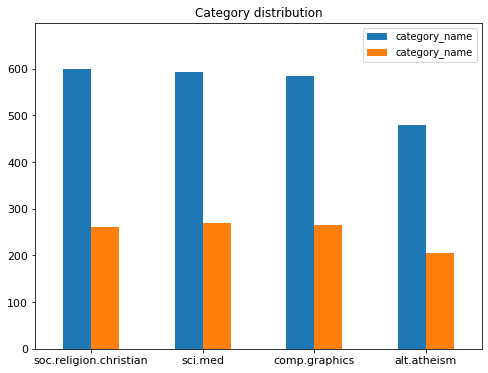

In [25]:
S1=pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],axis=1)
S1.plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, getMaxYlim(X.category_name.value_counts().values)],        
                                    rot = 0, fontsize = 11, figsize = (8,6))

In [26]:
import nltk
nltk.download('punkt')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
# Answer here
represent_words = []
index = 0
array = X_counts[0:5, 0:100].toarray()[4]
#get the value and index of that "1"
for i in range(0,len(array)):
  if(array[i]==1):
    index = i
    represent_words.append(count_vect.get_feature_names()[i])
represent_word = represent_words[1]#the "!" represent what in the get_feature_names() chose the second one(the 1 at the beginning of the fifth)
text = X[4:5]['unigrams'].values[0]#the origin text
newtext = ' '.join(map(str, text)) + ' '+represent_word#add the representword to the text
print(count_vect.transform([newtext]).toarray()[0][index] > array[index])#check if the same index of the array is added

True


In [29]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

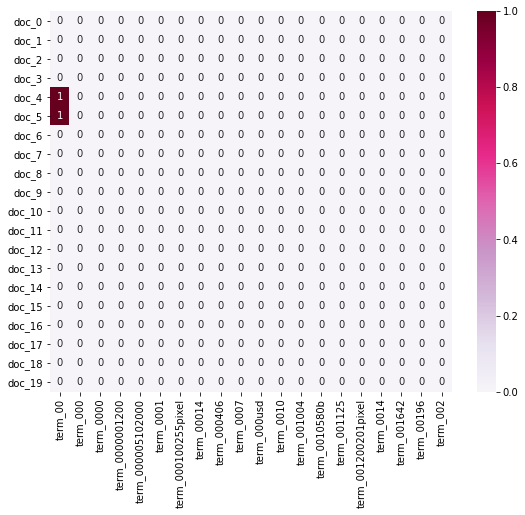

In [31]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [32]:
plot_z = X_counts.toarray()

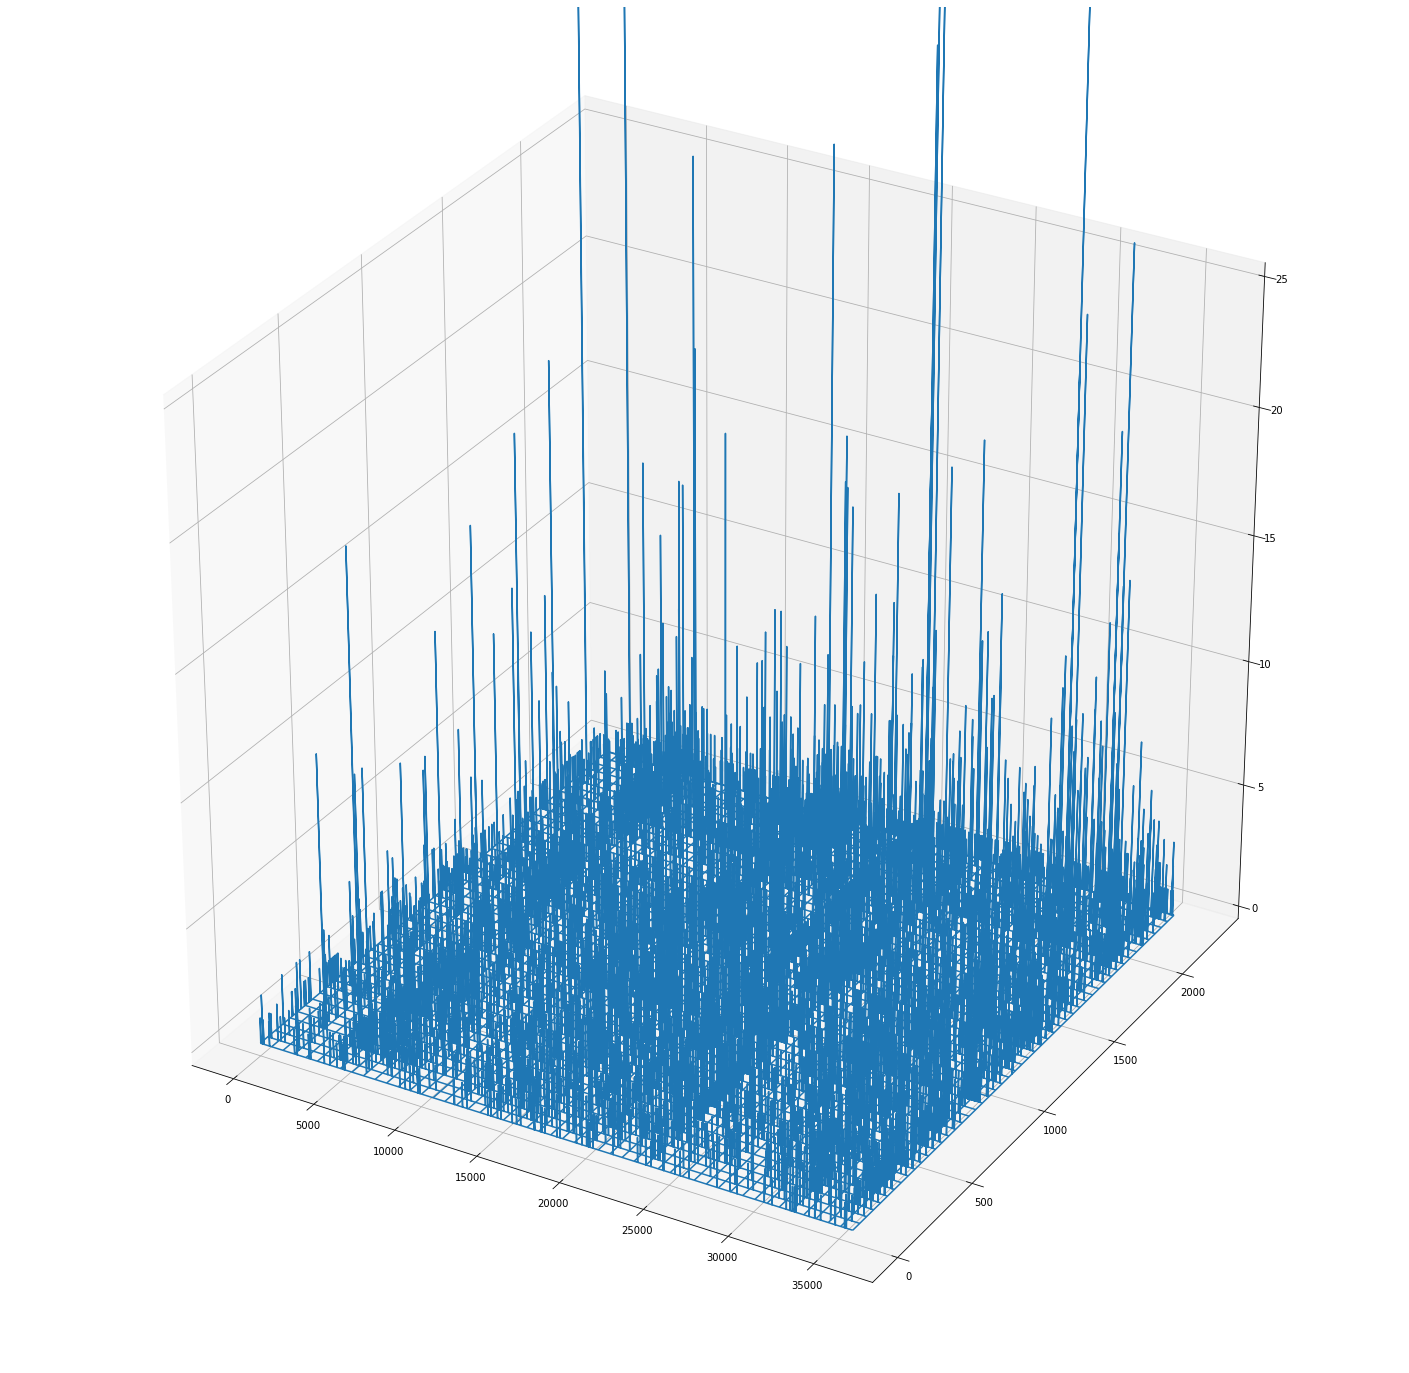

In [33]:
# Answer here
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()
ex11df = pd.DataFrame(X_counts.todense())
x = np.arange(0, len(plot_x), 1) # reprsent the first word till the last word
y = np.arange(0, len(plot_y), 1) # represent the first doc till the las

fig = plt.figure(figsize = (25,25))
ax = fig.gca(projection='3d')
ax.set_zlim3d(0,25)
x = np.arange(0, len(plot_x), 1) # reprsent the first word till the last word
y = np.arange(0, len(plot_y), 1) # represent the first doc till the last
plotX, plotY = np.meshgrid(x, y)
plotZ = plot_z #the frequency of every word
surf = ax.plot_wireframe(plotX, plotY, plotZ)
plt.show()

In [34]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())

In [35]:
col = ['coral', 'blue', 'black', 'm']

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [36]:

def show3dresult(elev,azim):
  fig = plt.figure(figsize = (25,10))
  ax = Axes3D(fig)
  for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs,ys,zs,c = c,marker='o')

  ax.set_xlabel('X label')
  ax.set_ylabel('Y label')
  ax.set_zlabel('Z label')
  ax.view_init(elev=elev, azim=azim)
  plt.show()

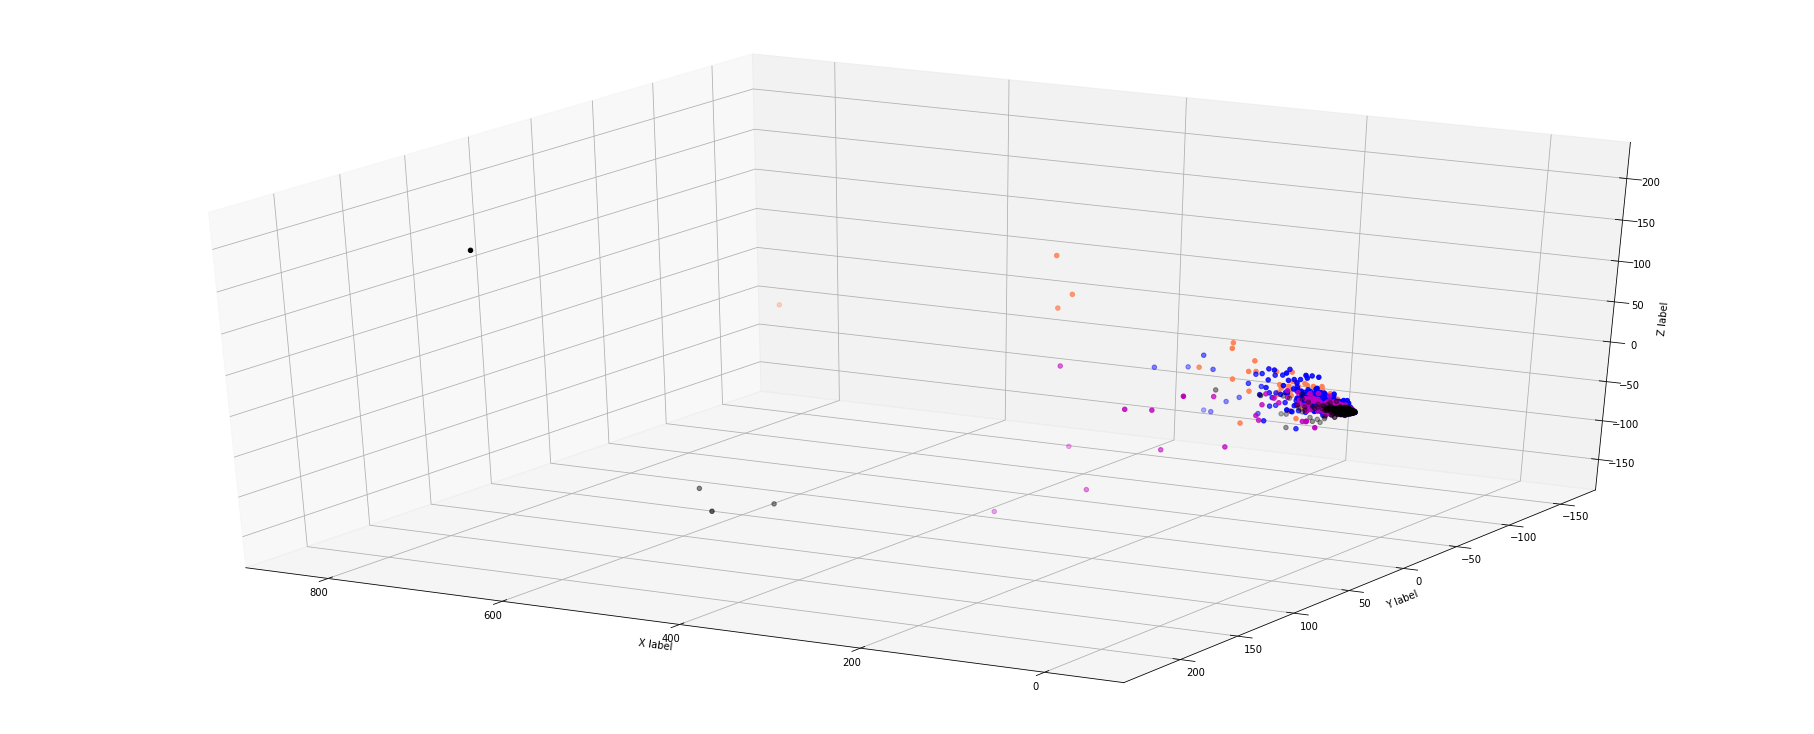

In [37]:
show3dresult(30,120)

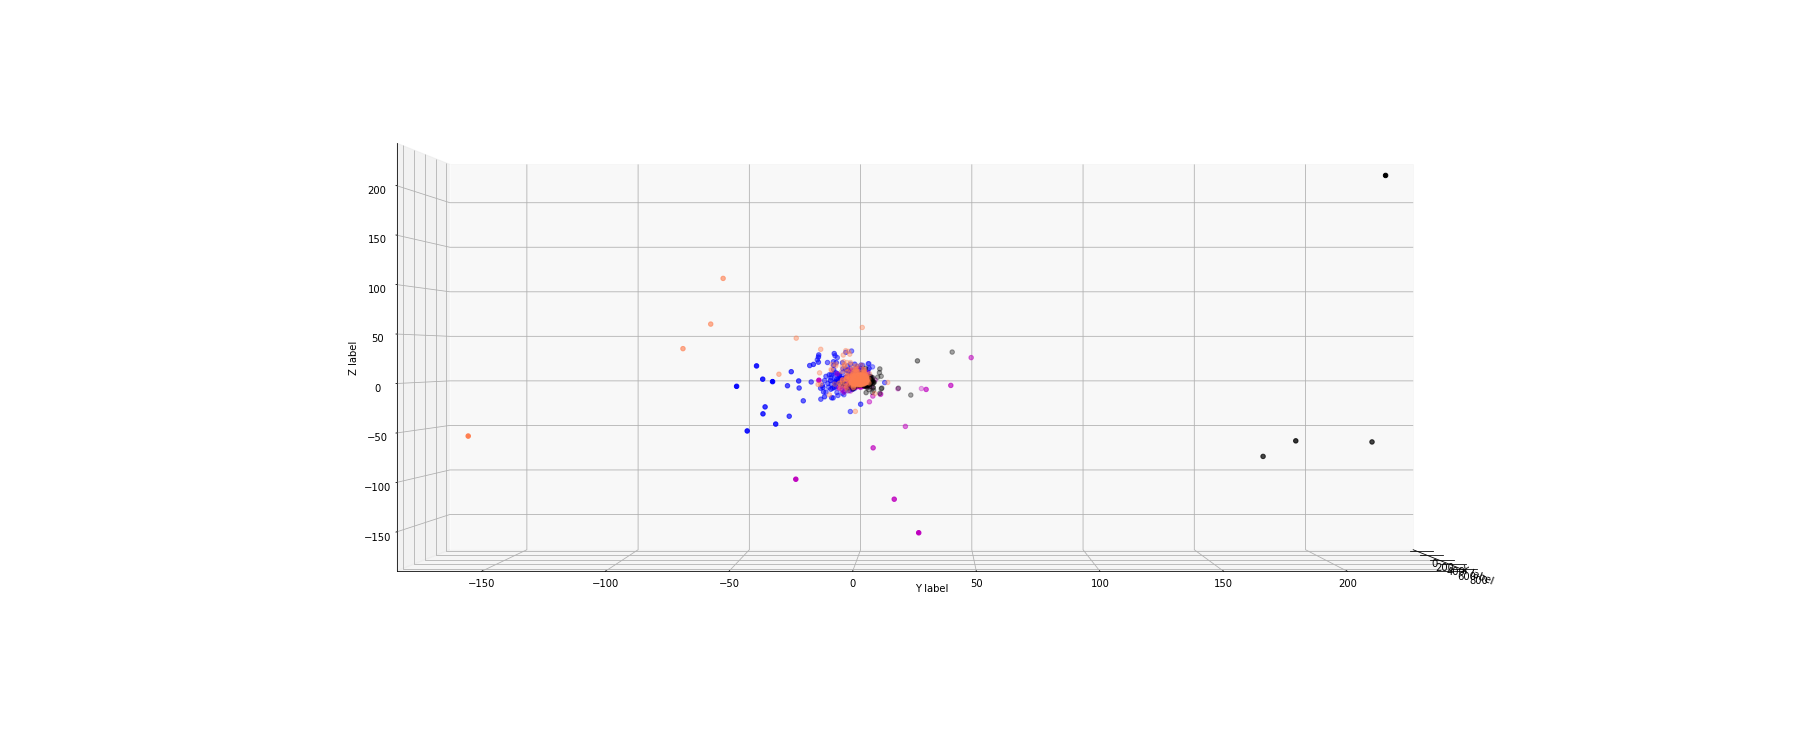

In [38]:
show3dresult(0,0)

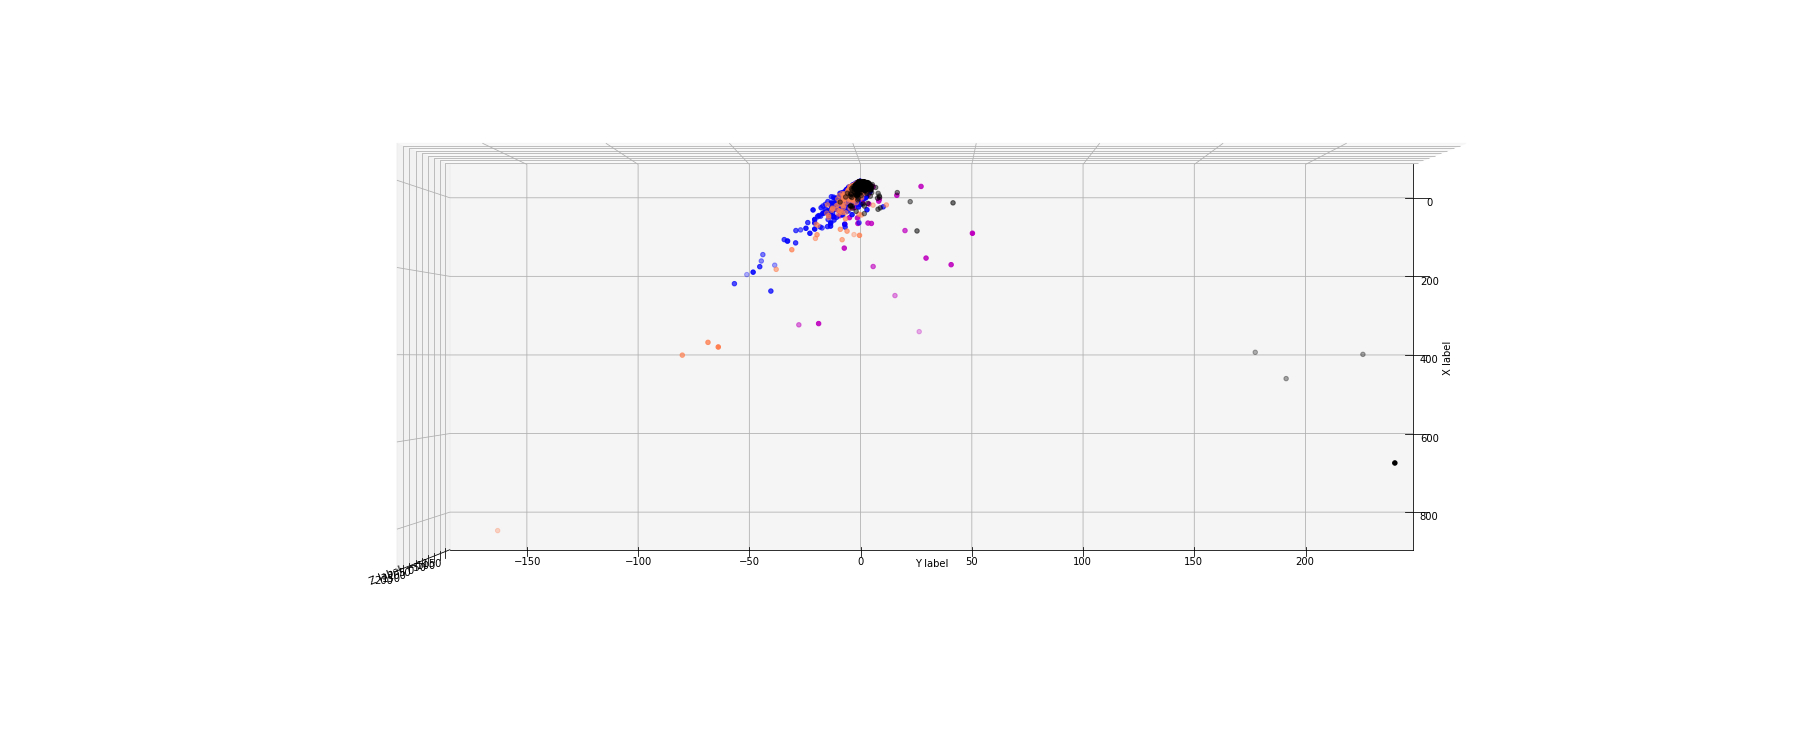

In [39]:
show3dresult(90,0)

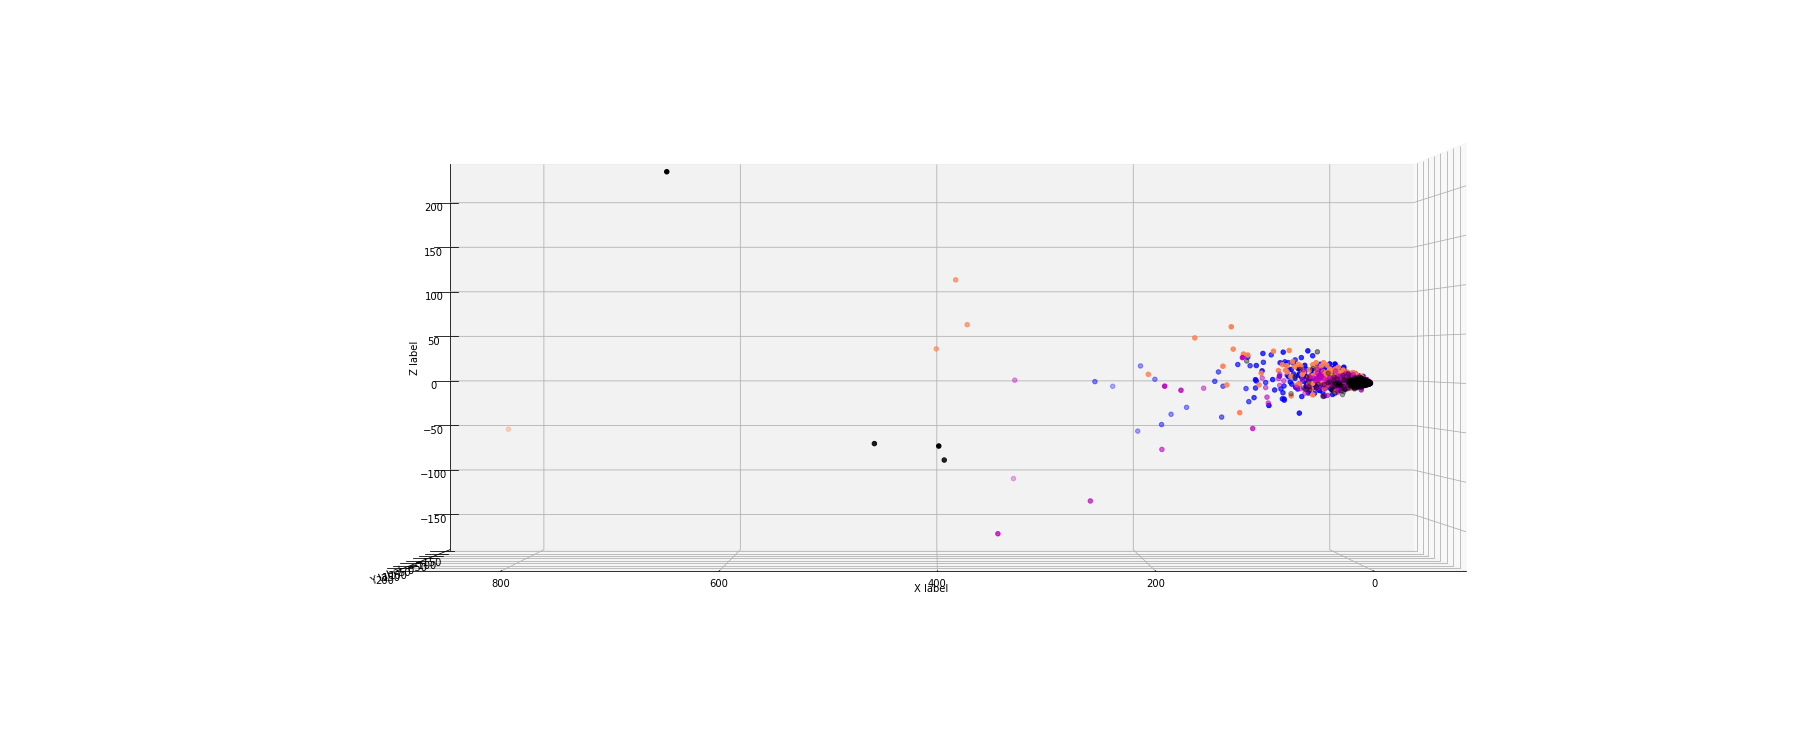

In [40]:
show3dresult(0,90)

In [41]:
#The data are concentrated in [0,-50,-50] ~ [200,50,50]

In [276]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:,j].toarray()))
#this for loop takes too much time
term_frequencies = np.squeeze(np.asarray(np.sum(X_counts,axis=0)))

In [ ]:
# term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

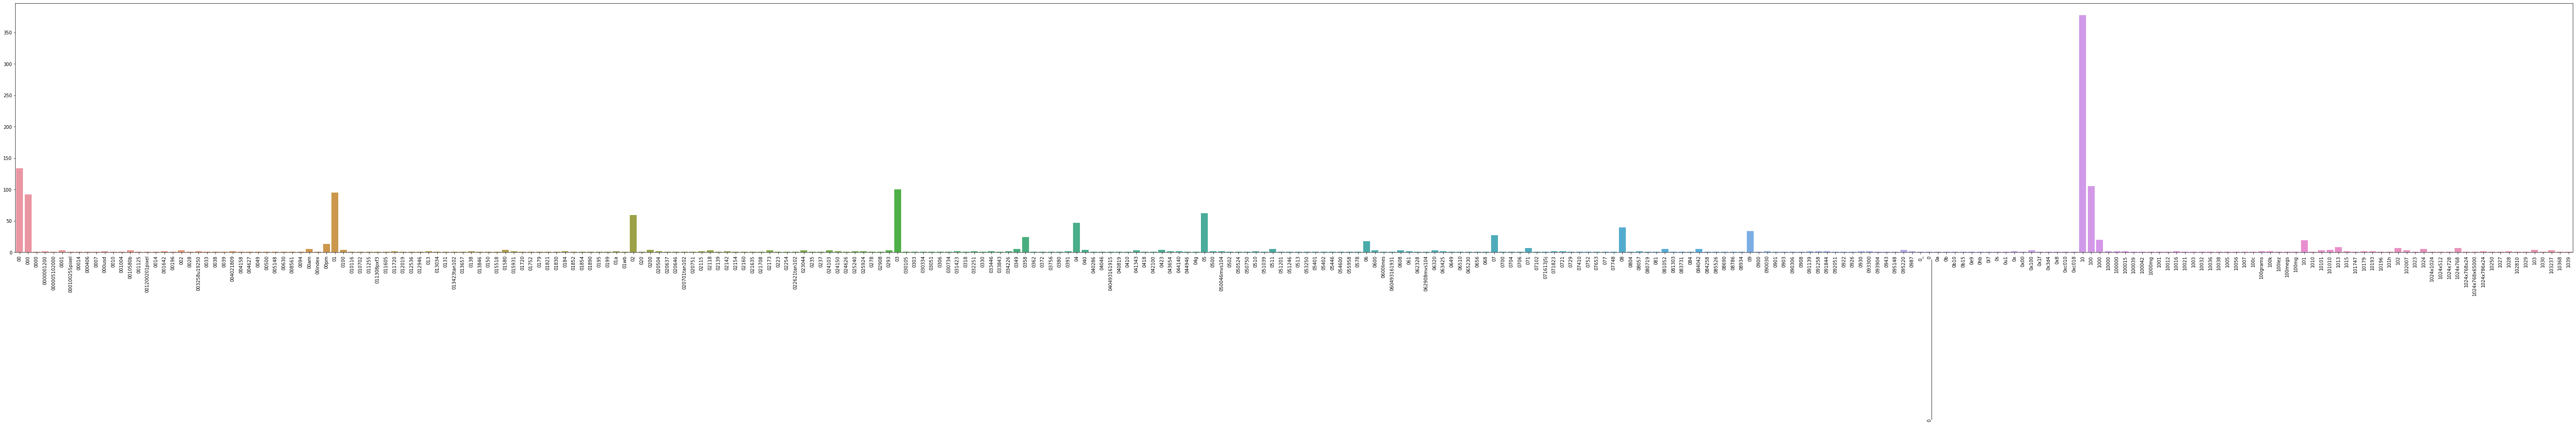

In [51]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [52]:
# Answer here
!pip install plotly

In [53]:
from pandas import DataFrame
x=count_vect.get_feature_names()[:300]
for i in range(0,len(x)):
  x[i] = "*"+x[i] #plotly identify the str which is full of number as number, so add a str to avoid  
y=term_frequencies[:300]
z = list(zip(x,y))
dataframe = DataFrame(z,columns=['feature_names','term_frequencies'])#change to a dataframe

In [54]:
import plotly.express as px
df = dataframe
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


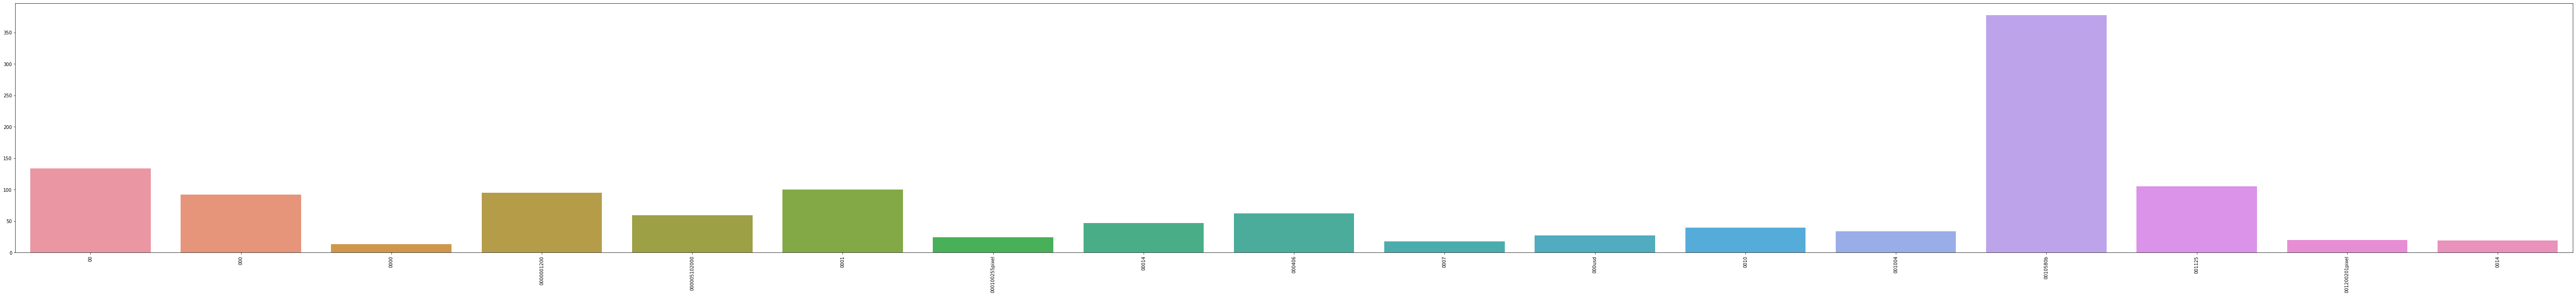

In [55]:
# Answer here
dic = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))
dic2 = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))#copy
lowerBound = 10
# only get the data whose frequency is more than lowerbound, now the lowerbound is 10
for key,value in dic.items():
  if(value <= lowerBound ):
    del dic2[key]
x = list(dic2.keys())
y = list(dic2.values())
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x,y=y)
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [56]:
import plotly.express as px
df = dataframe.query("term_frequencies > 10")# only get the data whose frequency is more than lowerbound(10)
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

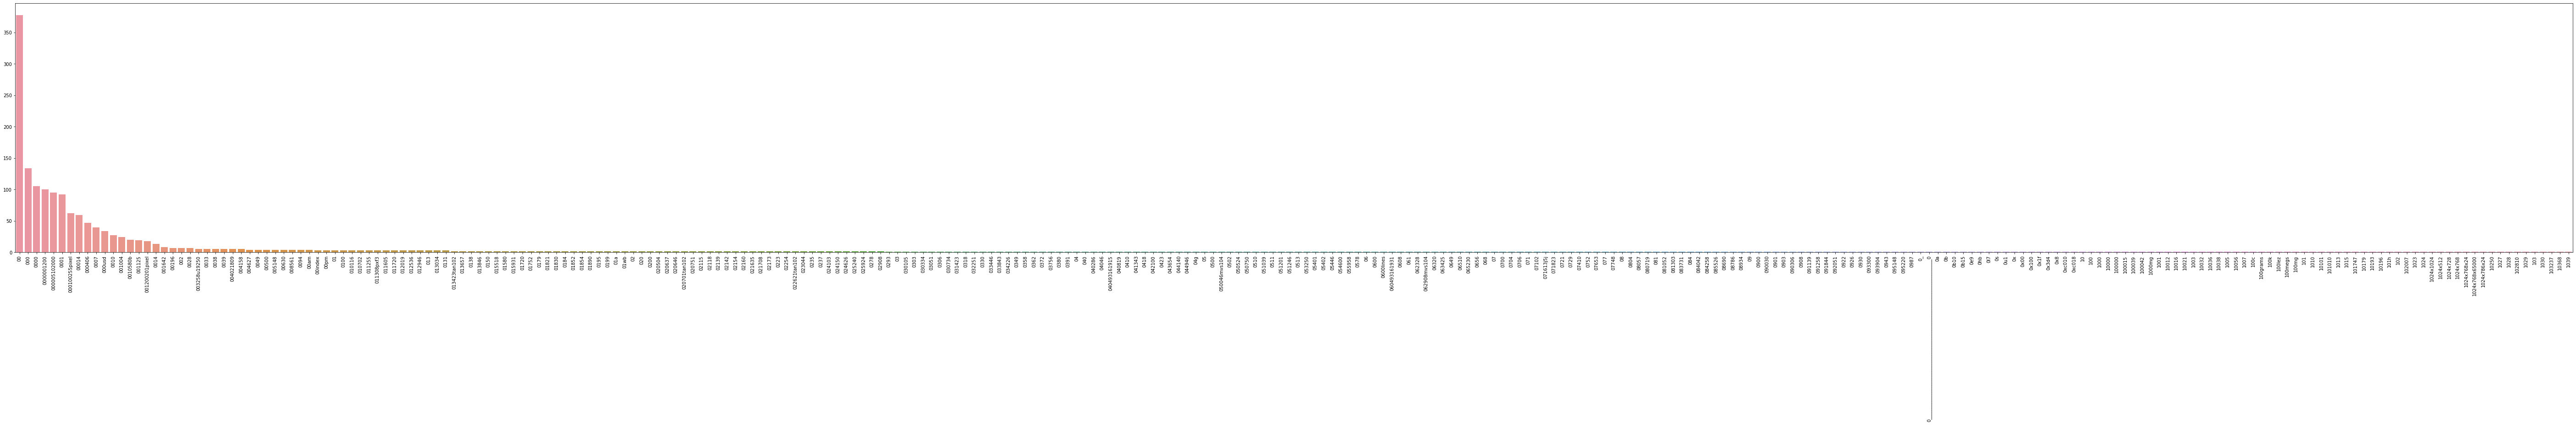

In [57]:
# Answer here
plt.subplots(figsize=(100, 10))
dic = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))
sortdic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}#sort the origin data by value
g = sns.barplot(x=list(sortdic.keys()), 
            y=list(sortdic.values()))
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [58]:
import plotly.express as px
df = dataframe.sort_values(by='term_frequencies', ascending=False)
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

In [59]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

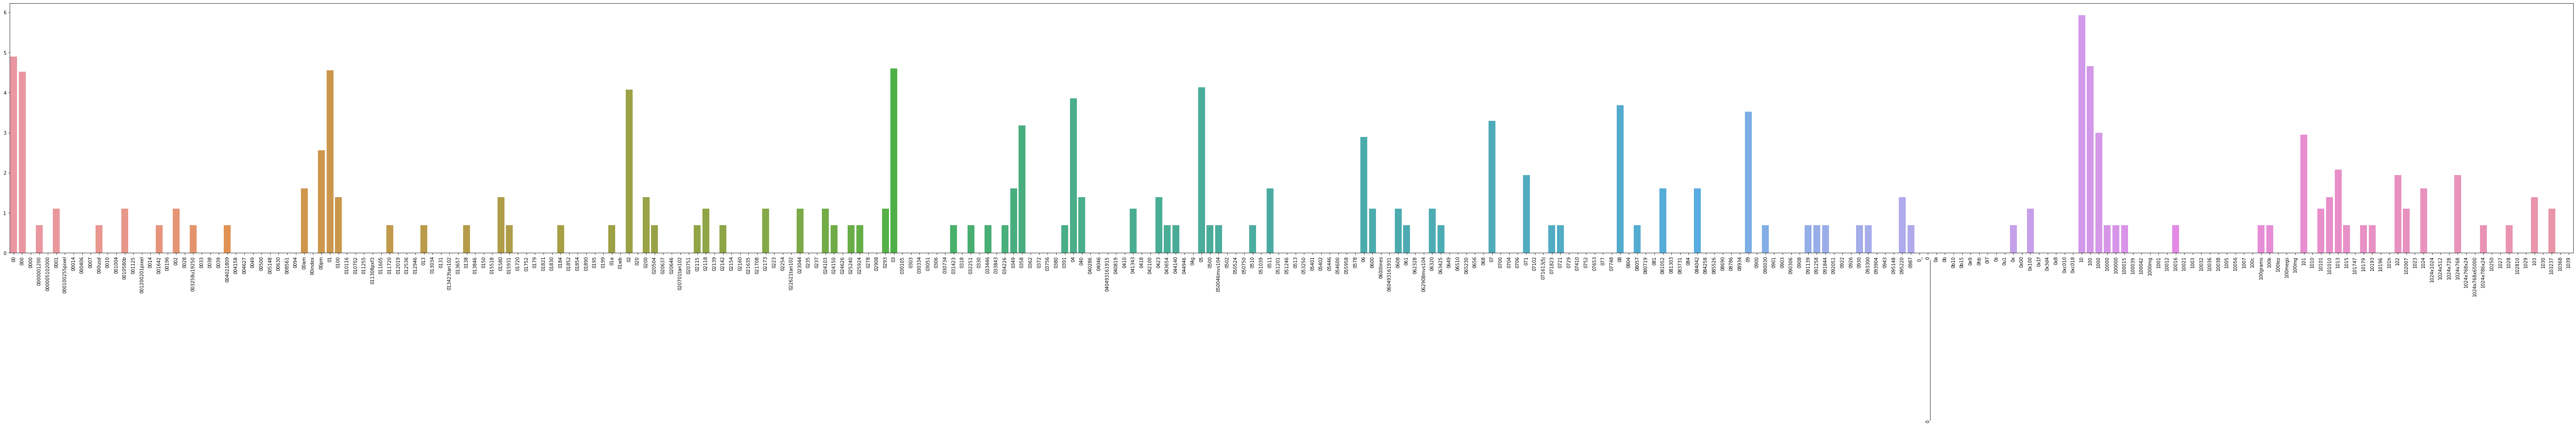

In [60]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);
#log funtion help us view the data easily

In [61]:
#sorted log function 
import plotly.express as px
df = dataframe.sort_values(by='term_frequencies', ascending=False)
df['term_frequencies'] = [math.log(i) for i in df['term_frequencies']]
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

In [62]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [63]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#it works!

text  ...  bin_category
0  From: sd345@city.ac.uk (Michael Collier) Subje...  ...  [0, 1, 0, 0]
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...  [0, 1, 0, 0]
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  ...  [0, 0, 0, 1]
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  ...  [0, 0, 0, 1]
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  ...  [0, 0, 0, 1]
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  ...  [0, 0, 0, 1]
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  ...  [0, 0, 0, 1]
7  From: aldridge@netcom.com (Jacquelin Aldridge)...  ...  [0, 0, 1, 0]
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...  ...  [0, 0, 1, 0]

[9 rows x 5 columns]

# Second
to save space , I delete some text cells

## 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

In [64]:
# categories
categories = [0,1,2]
categorie_names = ['amazon', 'imdb', 'yelp']

In [65]:
!ls

datamininghelper  helpers  sample_data


In [66]:
#download data from the original source
!wget –no-check-certificate 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip' -O 'textdata.zip' 
!unzip textdata.zip

--2020-10-22 15:04:50--  http://xn--no-check-certificate-2t2l/
Resolving xn--no-check-certificate-2t2l (xn--no-check-certificate-2t2l)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--no-check-certificate-2t2l’
--2020-10-22 15:04:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘textdata.zip’

textdata.zip        100%[===================>]  82.21K  --.-KB/s    in 0.06s   

2020-10-22 15:04:50 (1.35 MB/s) - ‘textdata.zip’ saved [84188/84188]

FINISHED --2020-10-22 15:04:50--
Total wall clock time: 0.3s
Downloaded: 1 files, 82K in 0.06s (1.35 MB/s)
Archive:  textdata.zip
   creating: sentiment labelled sentences/
  inflating: sentiment label

In [67]:
# obtain the documents containing the categories provided
import pandas as pd
text_data_files = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
text_data_df = []
for i in range(0,len(text_data_files)):
  df = pd.read_csv(
      'sentiment labelled sentences/'+text_data_files[i], sep='\t',header=None)
  df.columns = ['text','score']
  df['category'] = categories[i]
  df['category_name'] = categorie_names[i]
  text_data_df.append(df)
text_data_df_result = pd.concat([text_data_df[0],text_data_df[1],text_data_df[2]],axis=0, ignore_index=True)
text_data_df_result

text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2743  I think food should have flavor and texture an...  ...           yelp
2744                           Appetite instantly gone.  ...           yelp
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp

[2748 rows x 4 columns]

Let's take at look some of the records that are contained in our subset of the data

In [68]:
# twenty_train.data[0:2]

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [69]:
# twenty_train.target_names

In [70]:
# len(twenty_train.data)

In [71]:
# len(twenty_train.filenames)

#### We can also print an example from the subset

In [72]:
# # An example of what the subset contains
# print("\n".join(twenty_train.data[0].split("\n")))

... and determine the label of the example via `target_names` key value

In [73]:
# print(twenty_train.target_names[twenty_train.target[0]])

In [74]:
# twenty_train.target[0]

... we can also get the category of 10 documents via `target` key value 

In [75]:
# # category of first 10 documents.
# twenty_train.target[:10]

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [76]:
# for t in twenty_train.target[:10]:
#     print(twenty_train.target_names[t])

---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [77]:
# Answer here
# twenty_train.data[0:3]
text_data_df_result[0:3]

text  ...  category_name
0  So there is no way for me to plug it in here i...  ...         amazon
1                        Good case, Excellent value.  ...         amazon
2                             Great for the jawbone.  ...         amazon

[3 rows x 4 columns]

---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [78]:
# twenty_train.data[0:2]

In [79]:
# twenty_train.target

In [80]:
import pandas as pd
from helpers import data_mining_helpers as dmh
X = text_data_df_result

In [81]:
len(X)

2748

In [82]:
X[0:2]

text  ...  category_name
0  So there is no way for me to plug it in here i...  ...         amazon
1                        Good case, Excellent value.  ...         amazon

[2 rows x 4 columns]

In [83]:
for t in X["text"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [84]:
# # add category to the dataframe
# X['category'] = twenty_train.target

In [85]:
# # add category label also
#X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [86]:
X[0:10]

text  ...  category_name
0  So there is no way for me to plug it in here i...  ...         amazon
1                        Good case, Excellent value.  ...         amazon
2                             Great for the jawbone.  ...         amazon
3  Tied to charger for conversations lasting more...  ...         amazon
4                                  The mic is great.  ...         amazon
5  I have to jiggle the plug to get it to line up...  ...         amazon
6  If you have several dozen or several hundred c...  ...         amazon
7        If you are Razr owner...you must have this!  ...         amazon
8                Needless to say, I wasted my money.  ...         amazon
9                   What a waste of money and time!.  ...         amazon

[10 rows x 4 columns]

Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [87]:
#in fact this part is not so meaningful

In [88]:
# a simple query
X[0:10][["text", "score"]]

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
7        If you are Razr owner...you must have this!      1
8                Needless to say, I wasted my money.      0
9                   What a waste of money and time!.      0

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [89]:
X[-10:]

text  ...  category_name
2738  The refried beans that came with my meal were ...  ...           yelp
2739         Spend your money and time some place else.  ...           yelp
2740  A lady at the table next to us found a live gr...  ...           yelp
2741            the presentation of the food was awful.  ...           yelp
2742           I can't tell you how disappointed I was.  ...           yelp
2743  I think food should have flavor and texture an...  ...           yelp
2744                           Appetite instantly gone.  ...           yelp
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp

[10 rows x 4 columns]

Ready for some sourcery? Brace yourselves! Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records. For this we will use the build-in function called `iloc`. This allows us to query a selection of our dataset by position. 

In [90]:
# using loc (by position)
X.iloc[::10, 0:3][0:10]

text  score  category
0   So there is no way for me to plug it in here i...      0         0
10                    And the sound quality is great.      1         0
20  I went on Motorola's website and followed all ...      0         0
30  This is a simple little phone to use, but the ...      0         0
40  It has a great camera thats 2MP, and the pics ...      1         0
50  Not loud enough and doesn't turn on like it sh...      0         0
60  Essentially you can forget Microsoft's tech su...      0         0
70                                  Mic Doesn't work.      0         0
80      I wear it everyday and it holds up very well.      1         0
90  For a product that costs as much as this one d...      0         0

You can also use the `loc` function to explicity define the columns you want to query. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [91]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [92]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  ...  category_name
0   So there is no way for me to plug it in here i...  ...         amazon
10                    And the sound quality is great.  ...         amazon
20  I went on Motorola's website and followed all ...  ...         amazon
30  This is a simple little phone to use, but the ...  ...         amazon
40  It has a great camera thats 2MP, and the pics ...  ...         amazon
50  Not loud enough and doesn't turn on like it sh...  ...         amazon
60  Essentially you can forget Microsoft's tech su...  ...         amazon
70                                  Mic Doesn't work.  ...         amazon
80      I wear it everyday and it holds up very well.  ...         amazon
90  For a product that costs as much as this one d...  ...         amazon

[10 rows x 4 columns]

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [93]:
#Answer here
TEST = text_data_df_result
TEST[['text','score']] = TEST[['score','text']]
print(TEST)
TEST = text_data_df_result
TEST.loc[:,['text','score']] = TEST[['score','text']].to_numpy()
print(TEST)
TEST = text_data_df_result
print(TEST[:5])
print(TEST[::2])
print(TEST[::-1])

      text  ... category_name
0        0  ...        amazon
1        1  ...        amazon
2        1  ...        amazon
3        0  ...        amazon
4        1  ...        amazon
...    ...  ...           ...
2743     0  ...          yelp
2744     0  ...          yelp
2745     0  ...          yelp
2746     0  ...          yelp
2747     0  ...          yelp

[2748 rows x 4 columns]
                                                   text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2743  I think food should have flavor and texture an...  ...           yelp
2744   

In [94]:
print(TEST.loc[:,'category'])
print(TEST.loc[0,'category'])
print(TEST.loc[:,'text':'category'])
TEST.iloc[:3]['category'] 
TEST.iloc[1:3, :]
TEST.iloc[:, 1:3]
TEST.iloc[1]
TEST.loc[:, lambda df: ['text', 'category']]
TEST['category'].loc[lambda s: s > 2]
TEST.reindex([1, 20, 389])
TEST.sample(n=5)

0       0
1       0
2       0
3       0
4       0
       ..
2743    2
2744    2
2745    2
2746    2
2747    2
Name: category, Length: 2748, dtype: int64
0
                                                   text  score  category
0     So there is no way for me to plug it in here i...      0         0
1                           Good case, Excellent value.      1         0
2                                Great for the jawbone.      1         0
3     Tied to charger for conversations lasting more...      0         0
4                                     The mic is great.      1         0
...                                                 ...    ...       ...
2743  I think food should have flavor and texture an...      0         2
2744                           Appetite instantly gone.      0         2
2745  Overall I was not impressed and would not go b...      0         2
2746  The whole experience was underwhelming, and I ...      0         2
2747  Then, as if I hadn't wasted enough o

text  ...  category_name
681                      camera color balance is AWFUL.  ...         amazon
1253  Not frightening in the least, and barely compr...  ...           imdb
2078  The servers are not pleasant to deal with and ...  ...           yelp
2688                              It was equally awful.  ...           yelp
27    I didn't think that the instructions provided ...  ...         amazon

[5 rows x 4 columns]

---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [95]:
X

text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2743  I think food should have flavor and texture an...  ...           yelp
2744                           Appetite instantly gone.  ...           yelp
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp

[2748 rows x 4 columns]

In [96]:
# Answer here
#X.loc[::10, X.loc['category_name'] == 'comp.graphics' ][0:5]
X.loc[lambda f: f.category_name == 'amazon'].iloc[::10,:][0:5]
#not Applicable fot the text data

text  ...  category_name
0   So there is no way for me to plug it in here i...  ...         amazon
10                    And the sound quality is great.  ...         amazon
20  I went on Motorola's website and followed all ...  ...         amazon
30  This is a simple little phone to use, but the ...  ...         amazon
40  It has a great camera thats 2MP, and the pics ...  ...         amazon

[5 rows x 4 columns]

---

In [97]:
X.isnull()

text  score  category  category_name
0     False  False     False          False
1     False  False     False          False
2     False  False     False          False
3     False  False     False          False
4     False  False     False          False
...     ...    ...       ...            ...
2743  False  False     False          False
2744  False  False     False          False
2745  False  False     False          False
2746  False  False     False          False
2747  False  False     False          False

[2748 rows x 4 columns]

The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [98]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text  ...                       category_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 4 columns]

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [99]:
#not meaningful part

In [100]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [101]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "score"])

In [102]:
dummy_series

text     dummy_record
score               1
dtype: object

In [103]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [104]:
# check if the records was commited into result
len(result_with_series)

2749

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [105]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text  ...                       category_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   1

[2 rows x 4 columns]

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [106]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'score': 1
              }]

In [107]:
X = X.append(dummy_dict, ignore_index=True)

In [108]:
len(X)

2749

In [109]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text  ...                       category_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   1

[2 rows x 4 columns]

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [110]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [111]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text  ...                       category_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 4 columns]

In [112]:
len(X)

2748

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [113]:
#not meaningful

In [114]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [115]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [116]:
# Answer here
#column 2 and 3 and 5 store string "NaN" and string "None" and string "", they are not null in fact

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [117]:
X = text_data_df_result

In [118]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [119]:
sum(X.duplicated())

17

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by onyl checking the `text` attribute. 

In [120]:
sum(X.duplicated('text'))
#X.duplicated('text')

17

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [121]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'score': 1, 
            
                        },
                        {
                             'text': 'dummy record',
                             'score': 1, 
                        
                        }]

In [122]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [123]:
X

text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp
2748                                       dummy record  ...            NaN
2749                                       dummy record  ...            NaN

[2750 rows x 4 columns]

In [124]:
len(X)

2750

In [125]:
sum(X.duplicated('text'))

18

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [126]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [127]:
len(X)

2714

In [128]:
X

text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2743  I think food should have flavor and texture an...  ...           yelp
2744                           Appetite instantly gone.  ...           yelp
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp

[2714 rows x 4 columns]

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

In [129]:
X_before_sample = X ##Previous state refers to X before generating X_sample.?

In [130]:
X_sample = X.sample(n=1000) #random state

In [131]:
len(X_sample)

1000

In [132]:
X_sample[0:4]

text  ...  category_name
1732           She is as lovely as usual, this cutie!    ...           imdb
1478                        He's a national treasure.    ...           imdb
1656  This is one of the worst Sandra Bullock movie ...  ...           imdb
2394                                    What a mistake.  ...           yelp

[4 rows x 4 columns]

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [133]:
# Answer here
#X_sample
# X_sample is the data random chosen from X, so the Order of X_sample is random
print(X_before_sample.compare(X))
print(X_before_sample == X)
#X_before_sample is the data before genereate the sample of x
#and I user the compare function of dataframe and == to compare thme
#I believe there are no differences or I compare the run previous state?
#Previous state refers to X before generating X_sample.?
#help(X.sample)
#see the help of X.sample function , it will not change the X

Empty DataFrame
Columns: []
Index: []
      text  score  category  category_name
0     True   True      True           True
1     True   True      True           True
2     True   True      True           True
3     True   True      True           True
4     True   True      True           True
...    ...    ...       ...            ...
2743  True   True      True           True
2744  True   True      True           True
2745  True   True      True           True
2746  True   True      True           True
2747  True   True      True           True

[2714 rows x 4 columns]


---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
categories

[0, 1, 2]

yelp      992
amazon    980
imdb      742
Name: category_name, dtype: int64


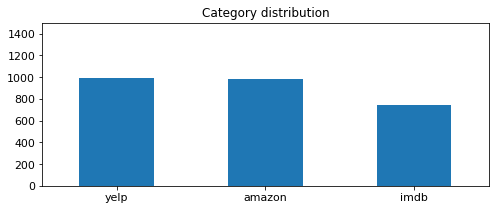

In [136]:


print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      394
amazon    348
imdb      258
Name: category_name, dtype: int64


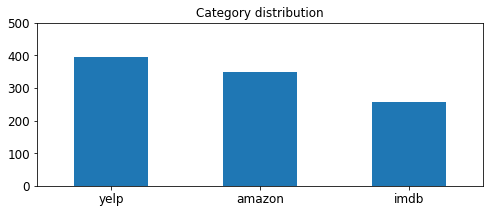

In [137]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 500], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

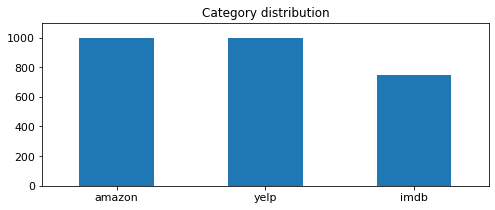

In [271]:
# Answer here

# plot barchart for X_sample
def getMaxYlim(values):
  return max(values)+100
    
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, getMaxYlim(X.category_name.value_counts().values)],        
                                    rot = 0, fontsize = 11, figsize = (8,3))




---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

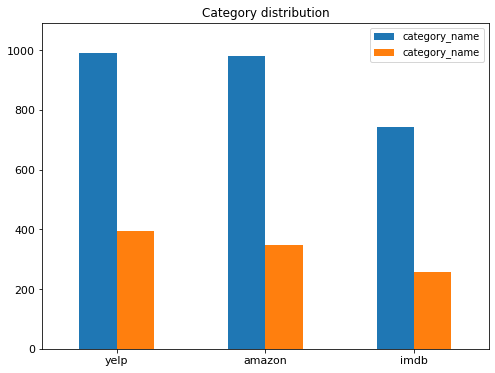

In [139]:
S1=pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],axis=1)
S1.plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, getMaxYlim(X.category_name.value_counts().items())],        
                                    rot = 0, fontsize = 11, figsize = (8,6))

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

In [140]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [142]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [143]:
X[0:4]

text  ...                                           unigrams
0  So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                        Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                             Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3  Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...

[4 rows x 5 columns]

In [144]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

What we did with those two lines of code is that we transorfmed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [146]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [147]:
# Answer here
type(X[0:-1]['text'].values)
for text in X[0:-1]['text'].values:
  print(analyze(text))
  break

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [148]:
analyze(" ".join(list(X[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

Now let us look at the term-document matrix we built above.

In [149]:
# We can check the shape of this matrix by:
X_counts.shape
# 35788 different words(tokeziens)

(2714, 5153)

In [150]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [151]:
X[0:5]

text  ...                                           unigrams
0  So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                        Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                             Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3  Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...
4                                  The mic is great.  ...                           [The, mic, is, great, .]

[5 rows x 5 columns]

In [152]:
# we convert from sparse array to normal array
buffer = X_counts[5].toarray()
#buffer
for i in range(0,len(buffer)):
  if(buffer[0][i]!=0):
    print(i)
    break

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [153]:
# # Answer here
#do not know choose which "1" and the text data is too few of one, it is hard to choose

---

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [154]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a `00` in the document to see if it is detected as we expect. 

In [155]:
count_vect.transform(['Something 00 completely 00 new.']).toarray()
#00 always the first( has fixed position)

array([[2, 0, 0, ..., 0, 0, 0]])

Impressive, huh!

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [156]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [157]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [158]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [159]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_19',
 'doc_20']

In [160]:
plot_z = X_counts[0:20, 0:20].toarray()

In [161]:
#plot_z

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

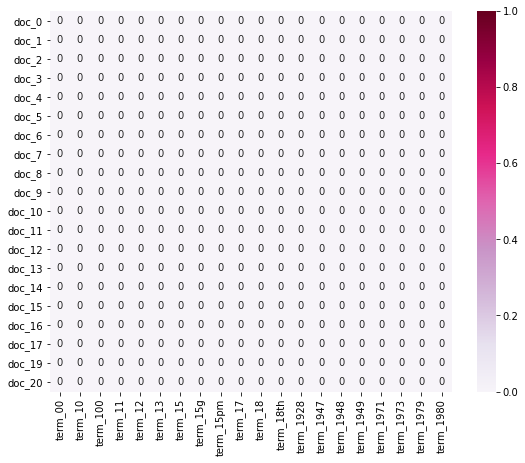

In [162]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [163]:
# Answer here
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()

In [164]:
ex11df = pd.DataFrame(X_counts.todense())

In [165]:
x = np.arange(0, len(plot_x), 1) # reprsent the first word till the last word
y = np.arange(0, len(plot_y), 1) # represent the first doc till the last

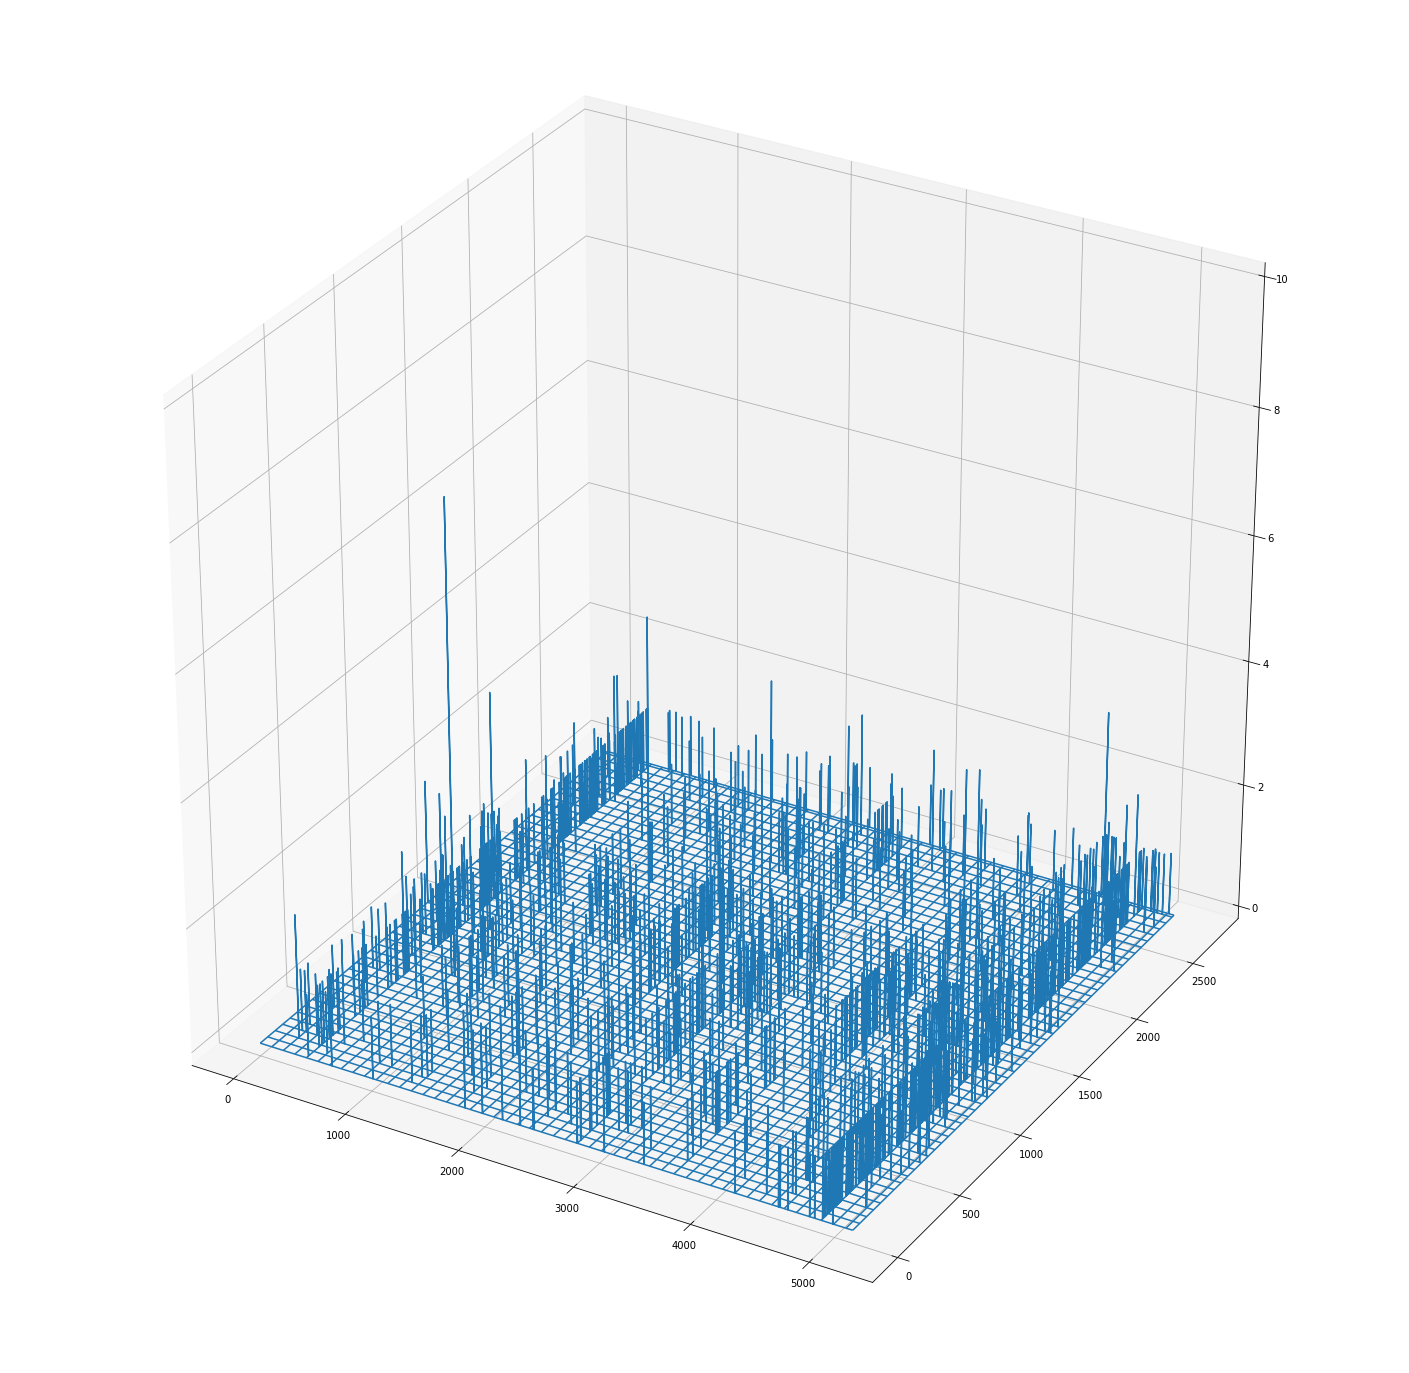

In [166]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (25,25))


ax = fig.gca(projection='3d')

ax.set_zlim3d(0,10)
x = np.arange(0, len(plot_x), 1) # reprsent the first word till the last word
y = np.arange(0, len(plot_y), 1) # represent the first doc till the last
plotX, plotY = np.meshgrid(x, y)
plotZ = plot_z #the frequency of every word
surf = ax.plot_wireframe(plotX, plotY, plotZ)
plt.show()

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [167]:
from sklearn.decomposition import PCA

In [168]:
X_counts.toarray().shape

(2714, 5153)

In [169]:
X_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())

In [170]:
X_reduced
X['category_name']

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2743      yelp
2744      yelp
2745      yelp
2746      yelp
2747      yelp
Name: category_name, Length: 2714, dtype: object

In [171]:
X_reduced.shape

(2714, 4)

In [172]:
X_reduced

array([[ 0.72253878,  1.10533116, -0.27694678,  0.12922153],
       [-1.02862925,  0.02793071,  0.08803029, -0.07053884],
       [-0.28912074, -0.00935712,  0.61152771, -0.28087307],
       ...,
       [-0.51567053, -0.5777113 , -0.41512334,  0.09600744],
       [ 0.30817678, -0.75715701, -0.20913259, -0.38478116],
       [ 2.16875905,  0.35122249,  0.7105218 , -0.94050644]])

In [173]:
categories

[0, 1, 2]

0
1
2


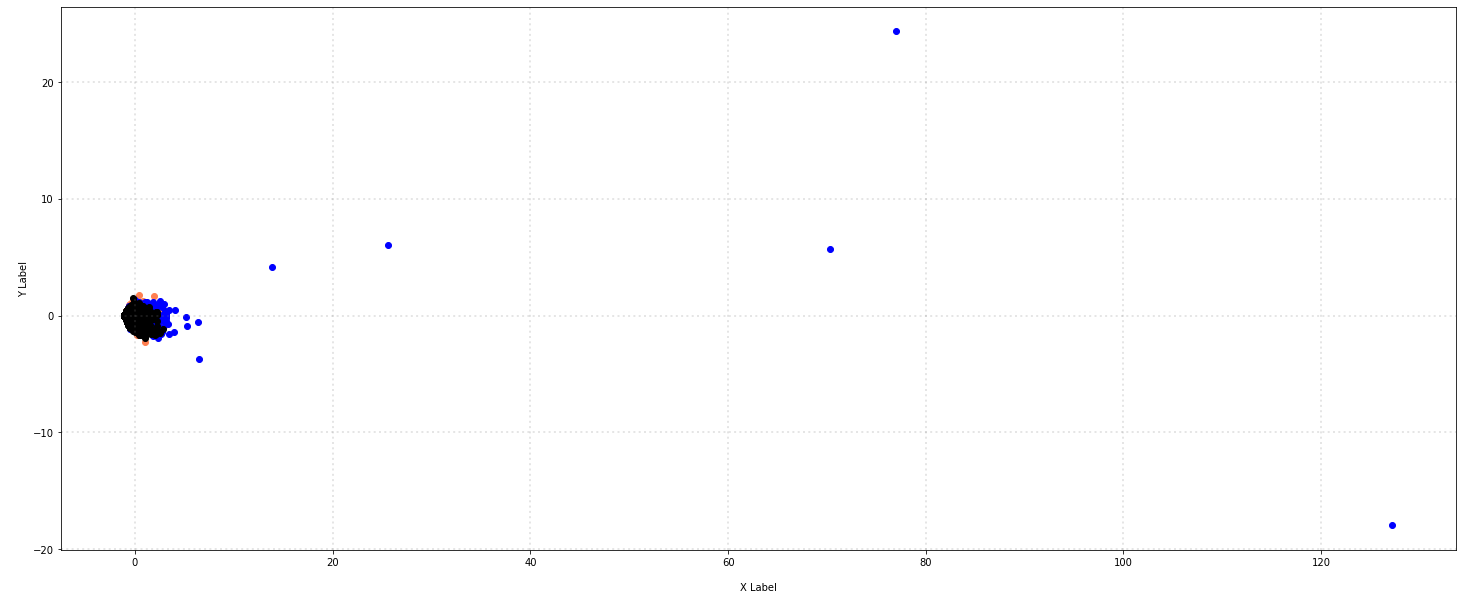

In [174]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    print(category)
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [175]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [176]:
def show3dresult(elev,azim):
  fig = plt.figure(figsize = (25,10))
  ax = Axes3D(fig)
  for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
    zs = X_reduced[X['category'] == category].T[2]
    ax.scatter(xs,ys,zs,c = c,marker='o')

  ax.set_xlabel('X label')
  ax.set_ylabel('Y label')
  ax.set_zlabel('Z label')
  ax.view_init(elev=elev, azim=azim)
  plt.show()

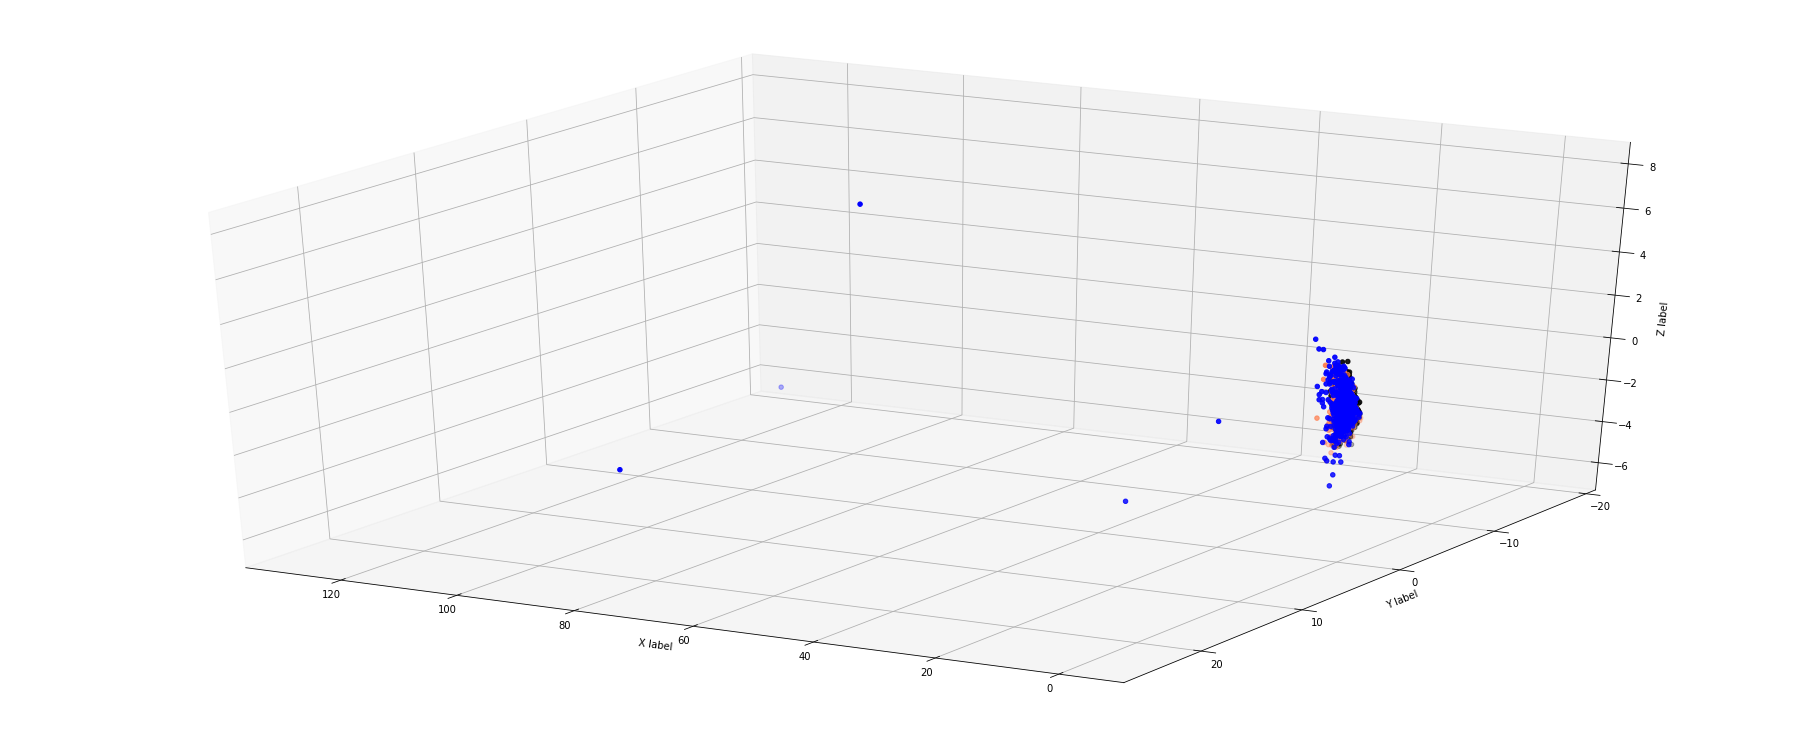

In [177]:
show3dresult(30,120)

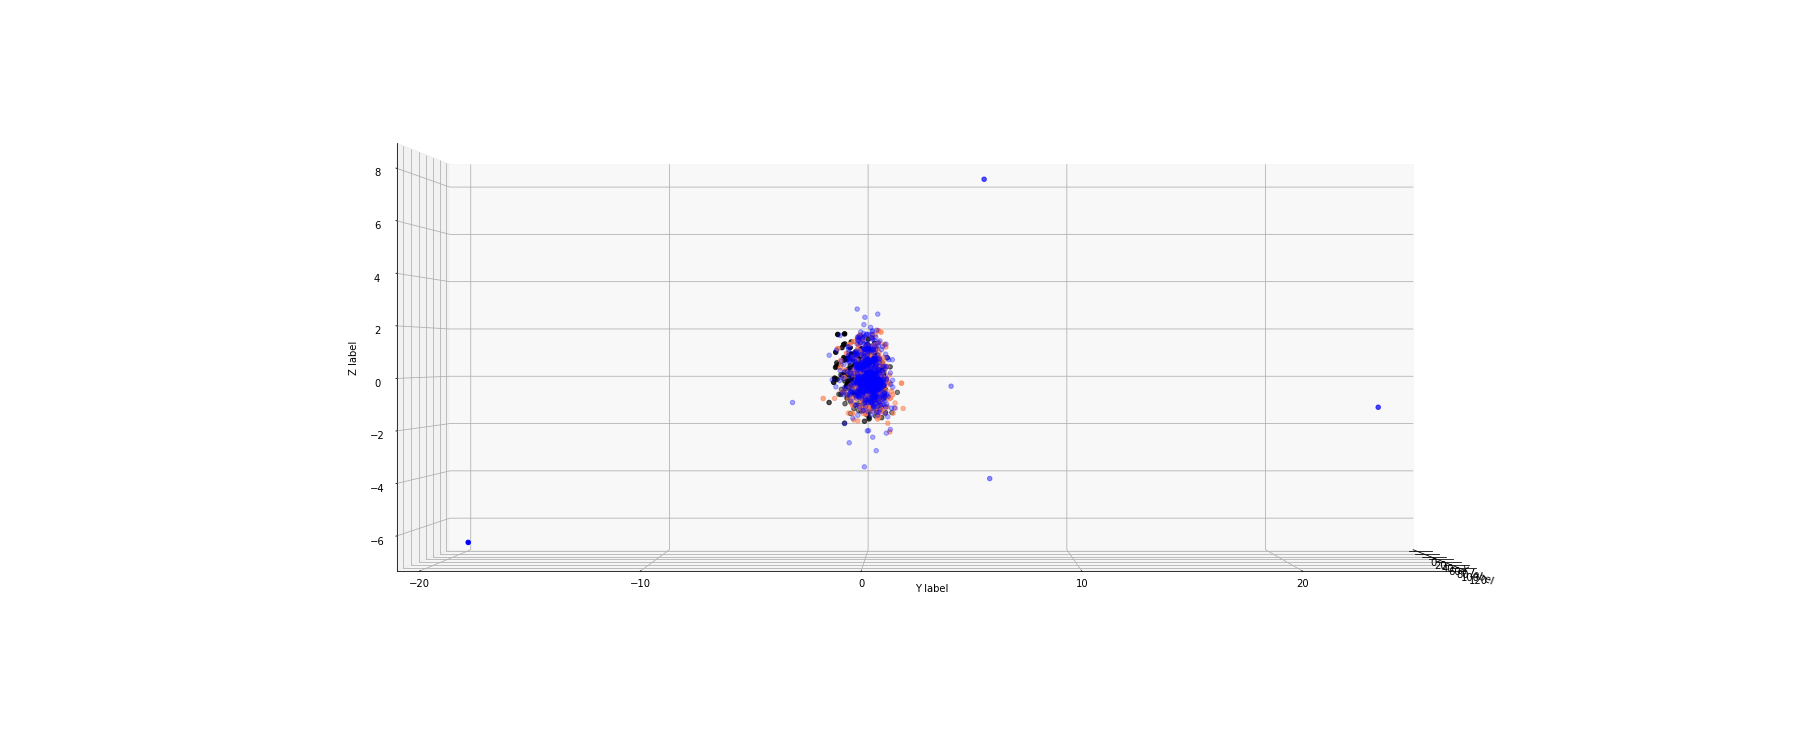

In [178]:
show3dresult(0,0)

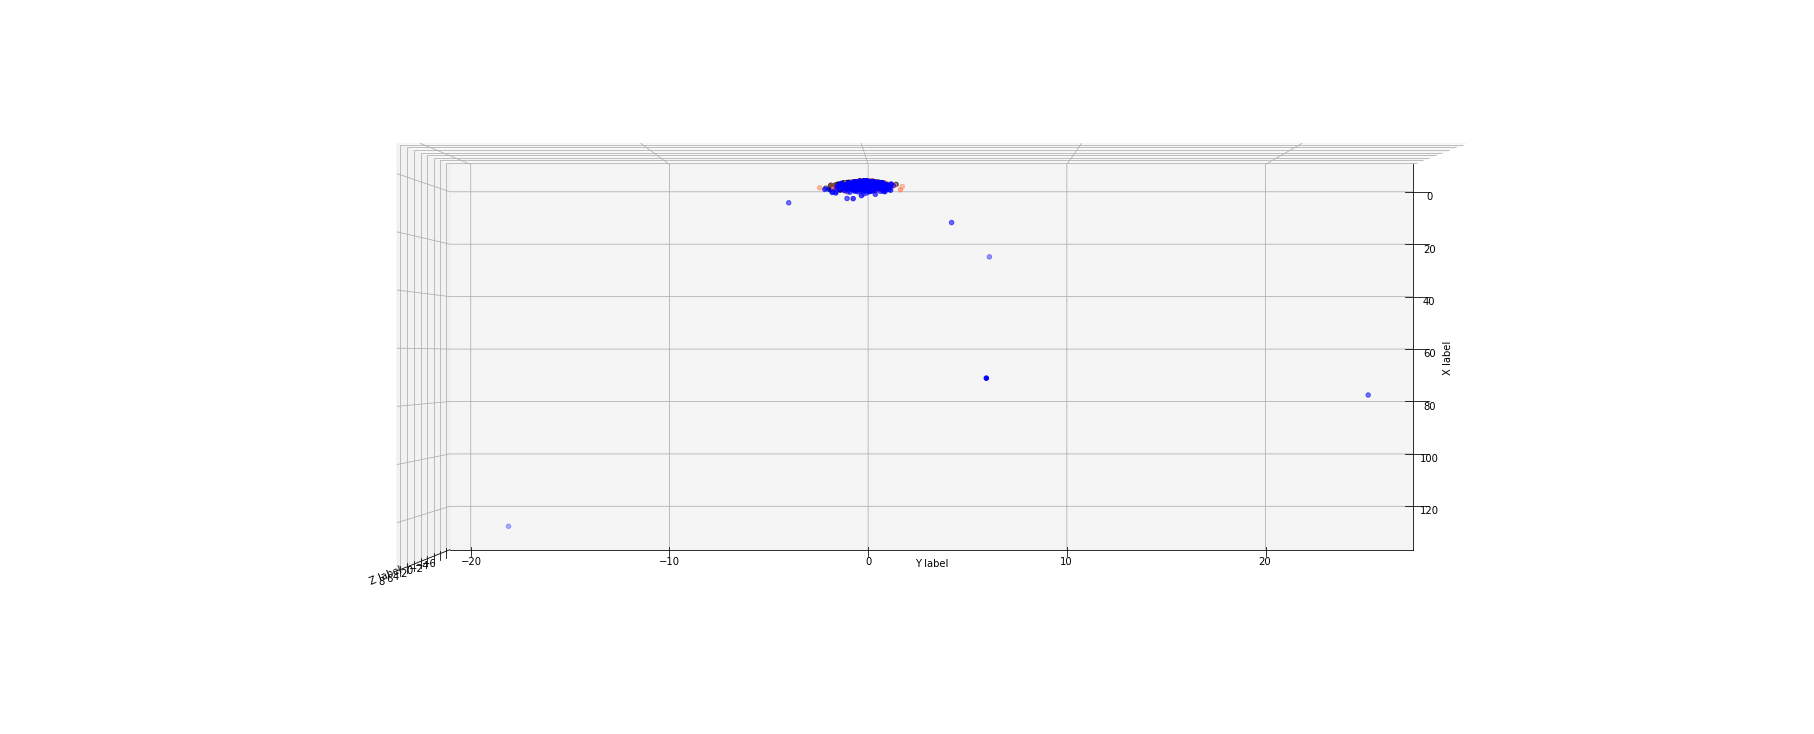

In [179]:
show3dresult(90,0)

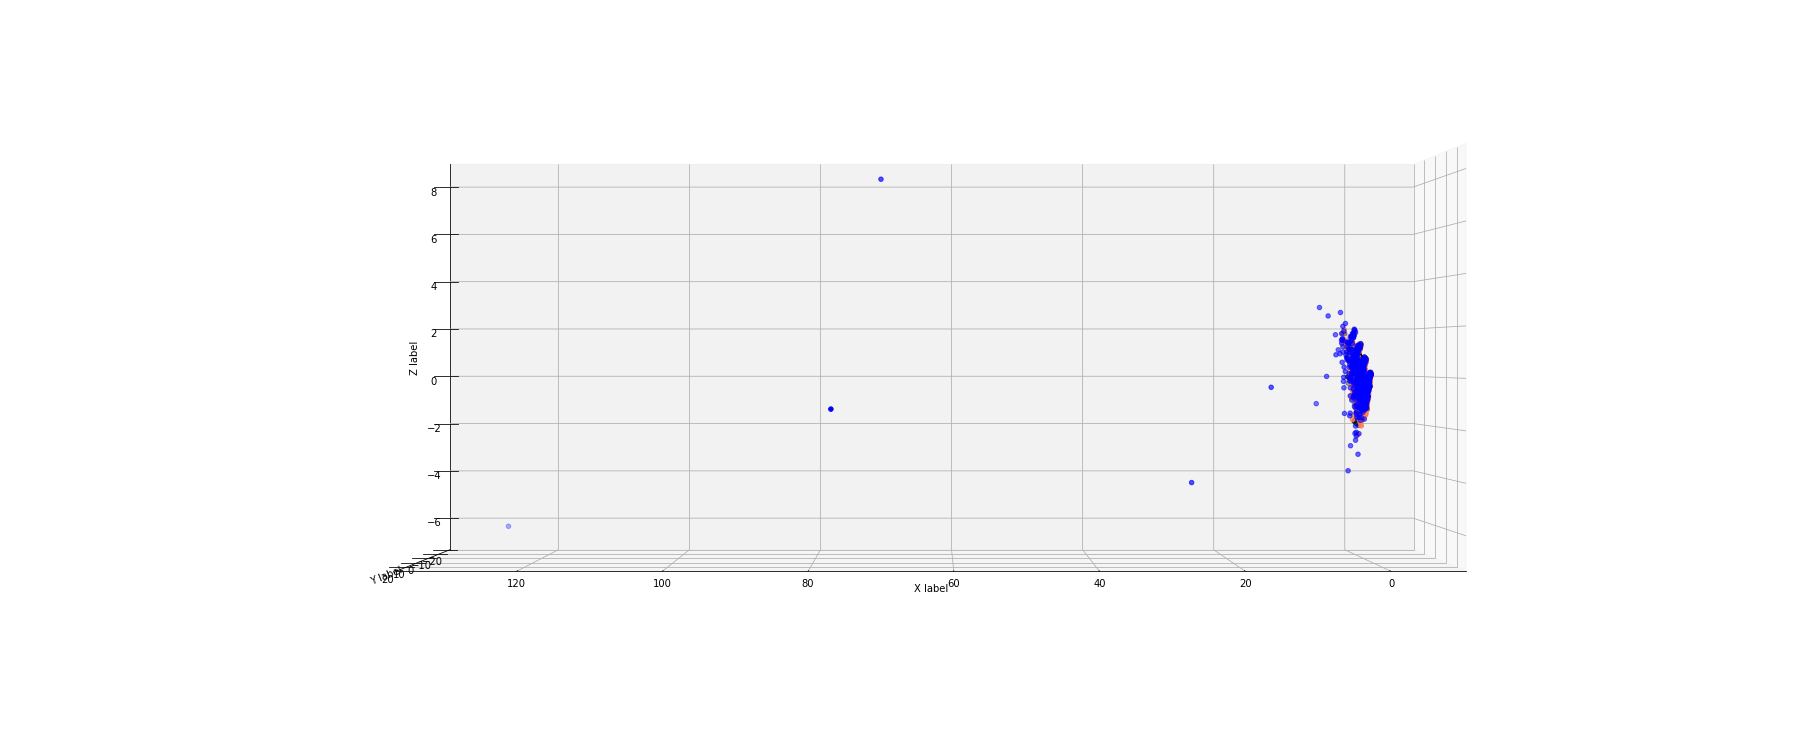

In [180]:
show3dresult(0,90)

In [181]:
#The data are concentrated in [0,-5,-2] ~ [5,5,2]
#the data is almost concentrated in a small area, and a little special data is far from the small area, maybe we can delete the special datas

---

In [182]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
#fsd
# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.squeeze(np.asarray(np.sum(X_counts,axis=0)))

In [183]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [184]:
term_frequencies

array([ 1, 34,  3, ...,  1,  2,  1], dtype=int64)

In [185]:
sns

<module 'seaborn' from '/usr/local/lib/python3.6/dist-packages/seaborn/__init__.py'>

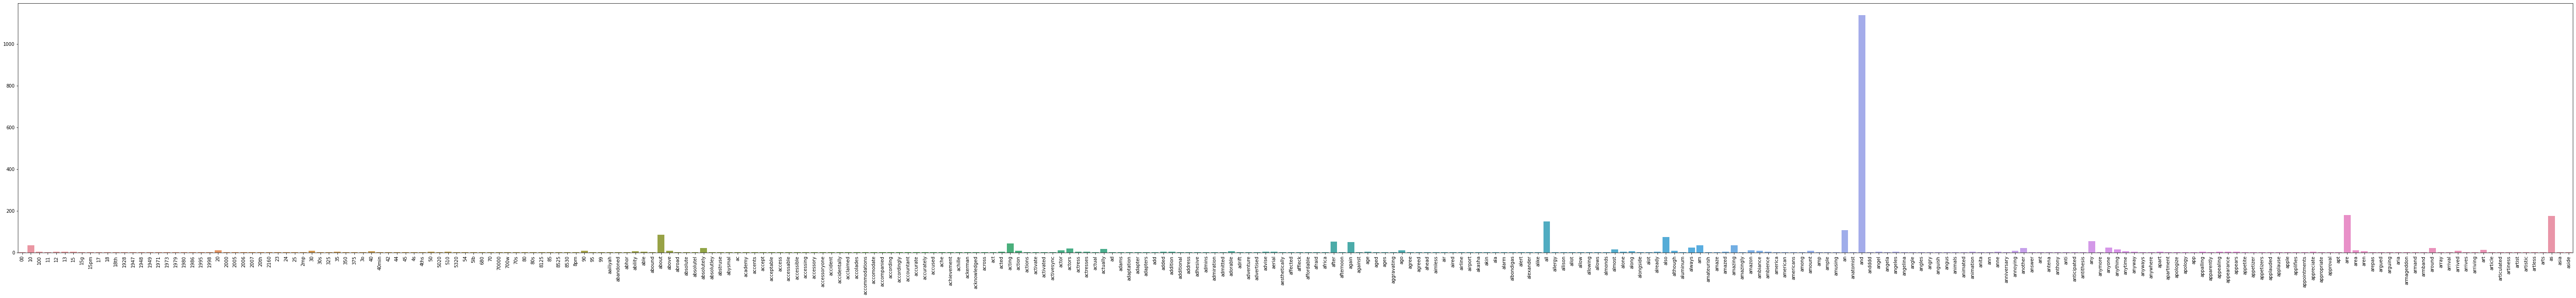

In [186]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [187]:
# Answer here
!pip install plotly

In [188]:
from pandas import DataFrame
x=count_vect.get_feature_names()[:300]
for i in range(0,len(x)):
  x[i] = "*"+x[i] #plotly identify the str which is full of number as number, so add a str to avoid  
y=term_frequencies[:300]
z = list(zip(x,y))
dataframe = DataFrame(z,columns=['feature_names','term_frequencies'])#change to a dataframe

In [189]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
df = dataframe
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


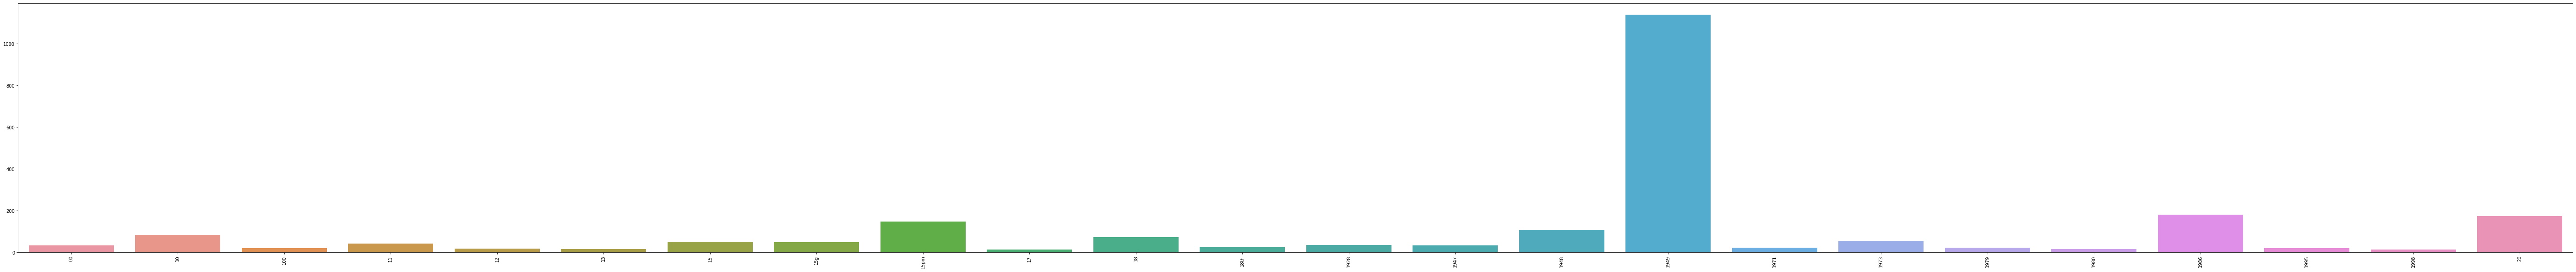

In [190]:
# Answer here
# count_vect.get_feature_names()[:300]
# term_frequencies[:300]
dic = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))
dic2 = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))#copy
lowerBound = 10
# only get the data whose frequency is more than lowerbound
for key,value in dic.items():
  if(value <= lowerBound ):
    del dic2[key]
x = list(dic2.keys())
y = list(dic2.values())
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x,y=y)
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [191]:
import plotly.express as px
#lowerbound = 10
df = dataframe.query("term_frequencies > 10")# only get the data whose frequency is more than lowerbound
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

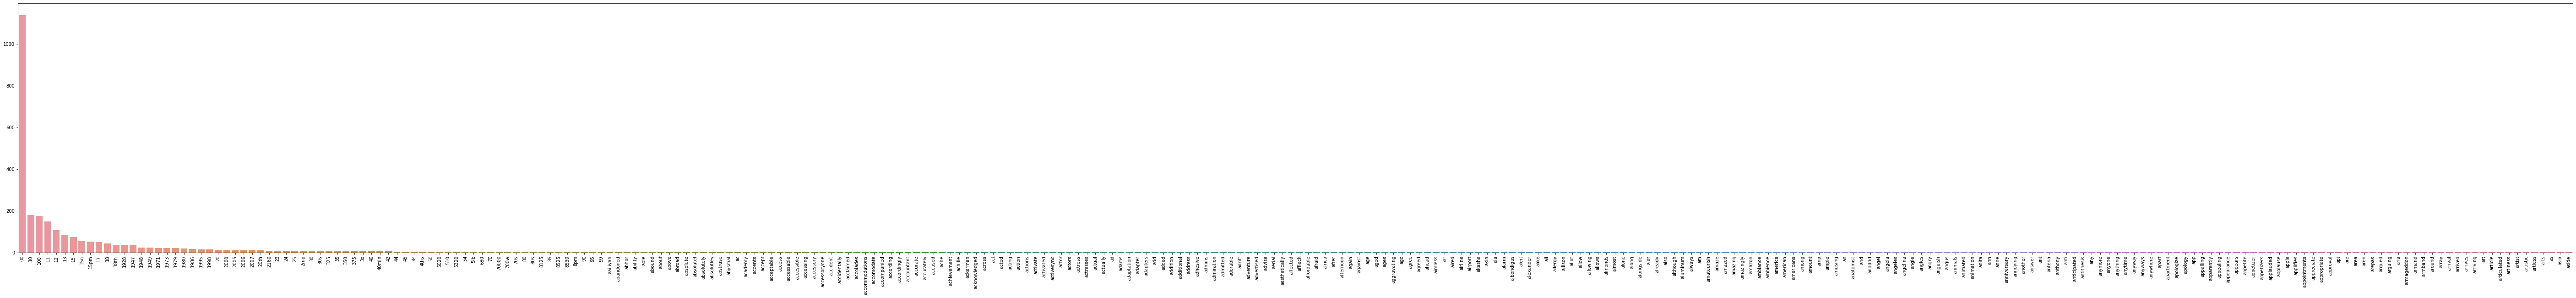

In [192]:
# Answer here
plt.subplots(figsize=(100, 10))
dic = dict(zip(count_vect.get_feature_names()[:300], term_frequencies[:300]))
sortdic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}#sort the origin data by value
g = sns.barplot(x=list(sortdic.keys()), 
            y=list(sortdic.values()))
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [193]:
import plotly.express as px
df = dataframe.sort_values(by='term_frequencies', ascending=False)
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [194]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

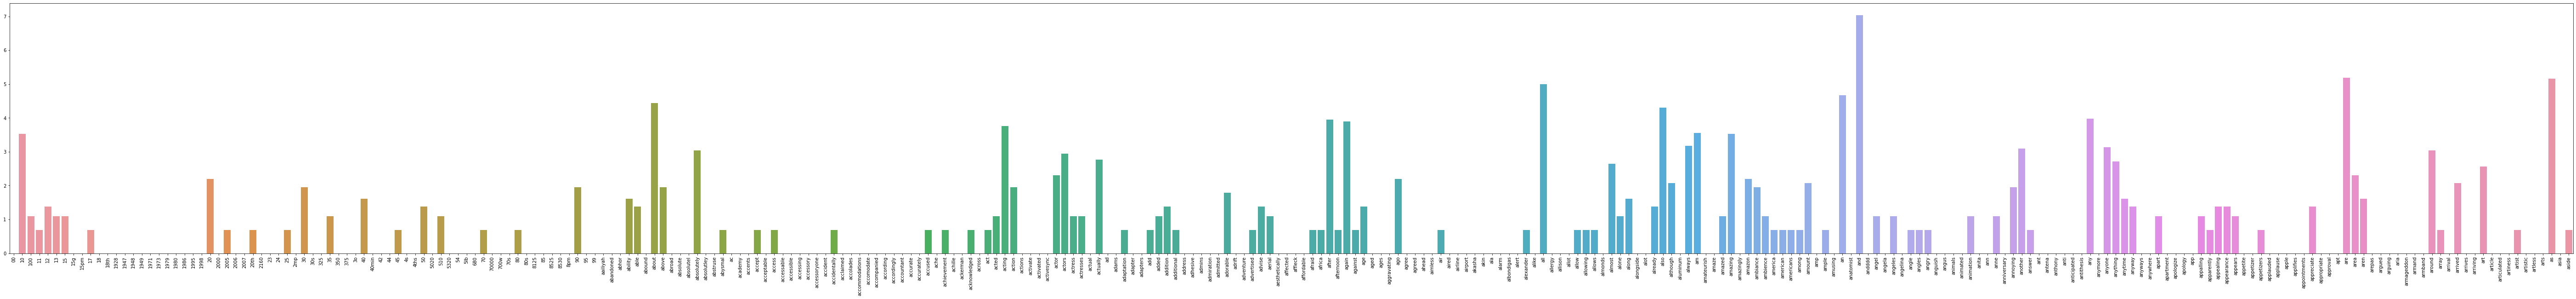

In [195]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);
#log funtion help us view the data easily

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

In [196]:
#sorted log function 
import plotly.express as px
df = dataframe.sort_values(by='term_frequencies', ascending=False)
df['term_frequencies'] = [math.log(i) for i in df['term_frequencies']]
fig = px.bar(df, y='term_frequencies', x='feature_names')
fig.show()

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [197]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [198]:
mlb = preprocessing.LabelBinarizer()

In [199]:
X

text  ...                                           unigrams
0     So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                           Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                                Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3     Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...
4                                     The mic is great.  ...                           [The, mic, is, great, .]
...                                                 ...  ...                                                ...
2743  I think food should have flavor and texture an...  ...  [I, think, food, should, have, flavor, and, te...
2744                           Appetite instantly gone.  ...                     [Appetite, instantly, gone, .]
2745  Overall I was not impressed and would not go b...  ...  [Overall, I, was, not, impressed, and, would, ...
2746  The whole experience was underwhelming, and I ...  ...  [The, whole, experience, was, underwhelming, ,...
2747  Then, as if I hadn't wasted enough of my life ...  ...  [Then, ,, as, if, I, had, n't, wasted, enough,...

[2714 rows x 5 columns]

In [200]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [201]:
mlb.classes_

array([0., 1., 2.])

In [202]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [203]:
X[0:9]

text  ...  bin_category
0  So there is no way for me to plug it in here i...  ...     [1, 0, 0]
1                        Good case, Excellent value.  ...     [1, 0, 0]
2                             Great for the jawbone.  ...     [1, 0, 0]
3  Tied to charger for conversations lasting more...  ...     [1, 0, 0]
4                                  The mic is great.  ...     [1, 0, 0]
5  I have to jiggle the plug to get it to line up...  ...     [1, 0, 0]
6  If you have several dozen or several hundred c...  ...     [1, 0, 0]
7        If you are Razr owner...you must have this!  ...     [1, 0, 0]
8                Needless to say, I wasted my money.  ...     [1, 0, 0]

[9 rows x 6 columns]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [204]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#it works!

text  ...  bin_category
0  So there is no way for me to plug it in here i...  ...     [1, 0, 0]
1                        Good case, Excellent value.  ...     [1, 0, 0]
2                             Great for the jawbone.  ...     [1, 0, 0]
3  Tied to charger for conversations lasting more...  ...     [1, 0, 0]
4                                  The mic is great.  ...     [1, 0, 0]
5  I have to jiggle the plug to get it to line up...  ...     [1, 0, 0]
6  If you have several dozen or several hundred c...  ...     [1, 0, 0]
7        If you are Razr owner...you must have this!  ...     [1, 0, 0]
8                Needless to say, I wasted my money.  ...     [1, 0, 0]

[9 rows x 6 columns]

---

## 6. Data Exploration


Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [205]:
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
random_record_1

'good protection and does not make phone too bulky.'

In [206]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
print(random_record_1)
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

text             good protection and does not make phone too bu...
score                                                            1
category                                                         0
category_name                                               amazon
unigrams         [good, protection, and, does, not, make, phone...
bin_category                                             [1, 0, 0]
Name: 51, dtype: object


In [207]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Let's look at our emails.

In [208]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [209]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [210]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in bthe documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# Third

## GET DATA

In [211]:
# categories
categories = [0,1,2]
categorie_names = ['amazon', 'imdb', 'yelp']

In [212]:
# obtain the documents containing the categories provided
import pandas as pd
text_data_files = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
text_data_df = []
for i in range(0,len(text_data_files)):
  df = pd.read_csv(
      'sentiment labelled sentences/'+text_data_files[i], sep='\t',header=None)
  df.columns = ['text','score']
  df['category'] = categories[i]
  df['category_name'] = categorie_names[i]
  text_data_df.append(df)
text_data_df_result = pd.concat([text_data_df[0],text_data_df[1],text_data_df[2]],axis=0, ignore_index=True)
text_data_df_result

text  ...  category_name
0     So there is no way for me to plug it in here i...  ...         amazon
1                           Good case, Excellent value.  ...         amazon
2                                Great for the jawbone.  ...         amazon
3     Tied to charger for conversations lasting more...  ...         amazon
4                                     The mic is great.  ...         amazon
...                                                 ...  ...            ...
2743  I think food should have flavor and texture an...  ...           yelp
2744                           Appetite instantly gone.  ...           yelp
2745  Overall I was not impressed and would not go b...  ...           yelp
2746  The whole experience was underwhelming, and I ...  ...           yelp
2747  Then, as if I hadn't wasted enough of my life ...  ...           yelp

[2748 rows x 4 columns]

In [213]:
import sys
import pandas as pd
from helpers import data_mining_helpers as dmh
X = text_data_df_result

In [214]:
X.dropna(inplace=True)

In [215]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text  ...                       category_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 4 columns]

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [217]:
analyze = count_vect.build_analyzer()

In [218]:
from sklearn.decomposition import PCA

In [219]:
X_counts.toarray().shape

(2748, 5155)

In [220]:
X_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())

In [221]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [222]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [223]:
mlb = preprocessing.LabelBinarizer()

In [224]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [225]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [226]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [227]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [228]:
X

text  ...                                           unigrams
0     So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                           Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                                Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3     Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...
4                                     The mic is great.  ...                           [The, mic, is, great, .]
...                                                 ...  ...                                                ...
2743  I think food should have flavor and texture an...  ...  [I, think, food, should, have, flavor, and, te...
2744                           Appetite instantly gone.  ...                     [Appetite, instantly, gone, .]
2745  Overall I was not impressed and would not go b...  ...  [Overall, I, was, not, impressed, and, would, ...
2746  The whole experience was underwhelming, and I ...  ...  [The, whole, experience, was, underwhelming, ,...
2747  Then, as if I hadn't wasted enough of my life ...  ...  [Then, ,, as, if, I, had, n't, wasted, enough,...

[2748 rows x 6 columns]

# **other visualization**

count of unigrams(the word number of each sequence)

In [229]:
X['unigrams_count'] = X['unigrams'].apply(lambda x: len(x))

In [230]:
import plotly.express as px
dataframe = X
df = dataframe.sort_values(by='unigrams_count', ascending=False)
fig = px.line(df, y='unigrams_count', x='text')
fig.update_yaxes(range=[0, 100])
fig.show()

Most Frequently Occuring nigrams

In [231]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
ADDITIONAL_STOPWORDS = ['covfefe']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [232]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [233]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [234]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(work, great)          20
(go, back)             18
(waste, time)          17
(customer, service)    14
(ive, ever)            14
(would, recommend)     14
(sound, quality)       13
(one, best)            12
(dont, waste)          12
(waste, money)         11
dtype: int64

In [235]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12] #
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

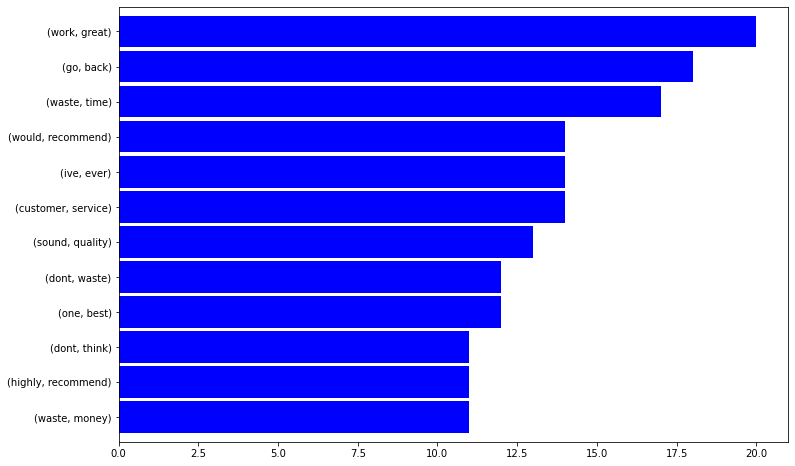

In [236]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

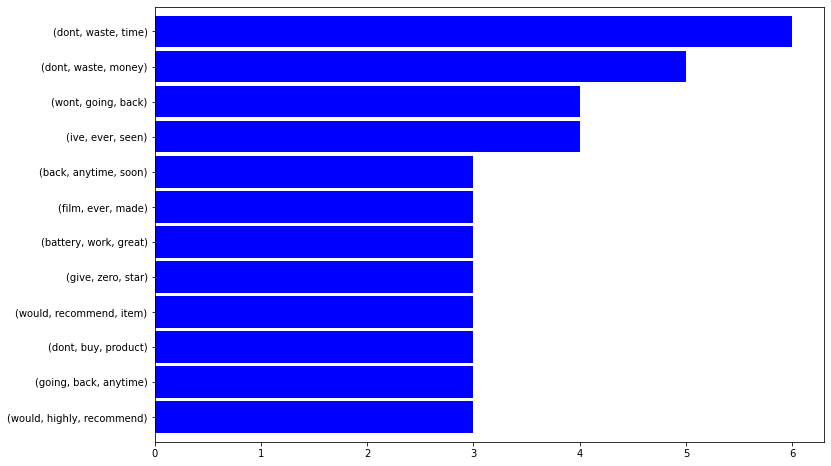

In [237]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

word-embedding word2vec visualization

In [238]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np

     |████████████████████████████████| 24.2MB 131kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [239]:
model = Word2Vec(X['unigrams'][0:50],size=len(X['unigrams'][0:50]),sg=1,min_count=1)

In [240]:
words=list(model.wv.vocab)

In [241]:
wweX=model[model.wv.vocab]
wweX
wwedf=pd.DataFrame(wweX)
wwedf.shape
wwedf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



0         1         2   ...        47        48        49
0 -0.000805 -0.005261  0.005852  ...  0.000354 -0.006591  0.006411
1 -0.001644  0.003393  0.000688  ... -0.007044  0.009807 -0.009824
2 -0.007644 -0.005149  0.000363  ...  0.009541  0.003670 -0.004363
3 -0.008109 -0.006072 -0.001527  ...  0.009833  0.007541 -0.004001
4 -0.000881 -0.010046 -0.005870  ...  0.005818 -0.003559  0.006877

[5 rows x 50 columns]

In [242]:
#Computing the correlation matrix
X_corr=wwedf.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(wweX,new_vectors)

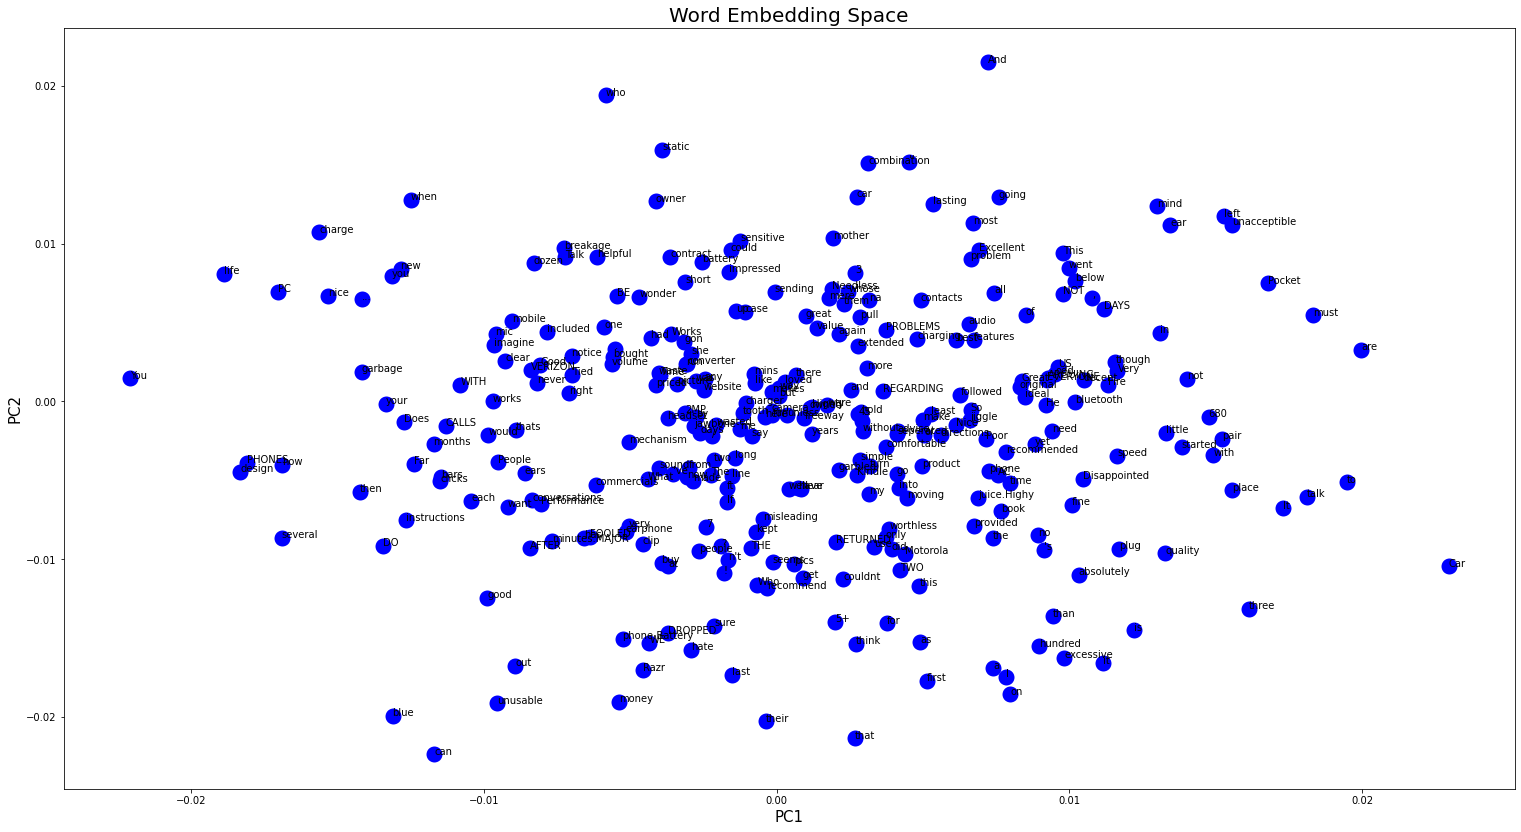

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,14))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))


cosine_similarity of every word with every other word

In [244]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
size = 10
consine_array = np.zeros((size,len(X['text'])))

# the calculate is too slow, calculate the first 10
for i in range(0,10): 
  buffer1 = []
  buffer1.append(X['text'][i])
  buffer1 = binarize(count_vect.transform(buffer1).todense())
  for j in range(len(X['text'])):
    buffer2 = []
    buffer2.append(X['text'][j])
    buffer2 = binarize(count_vect.transform(buffer2).todense())
    if(j!=i):
      consine_array[i][j] = cosine_similarity(buffer1, buffer2, dense_output=True)


In [245]:
consine_array

array([[0.        , 0.        , 0.23570226, ..., 0.08333333, 0.1767767 ,
        0.28284271],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 0.        , ..., 0.        , 0.125     ,
        0.1       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07071068],
       [0.09622504, 0.        , 0.        , ..., 0.        , 0.10206207,
        0.24494897],
       [0.        , 0.        , 0.        , ..., 0.14433757, 0.20412415,
        0.16329932]])

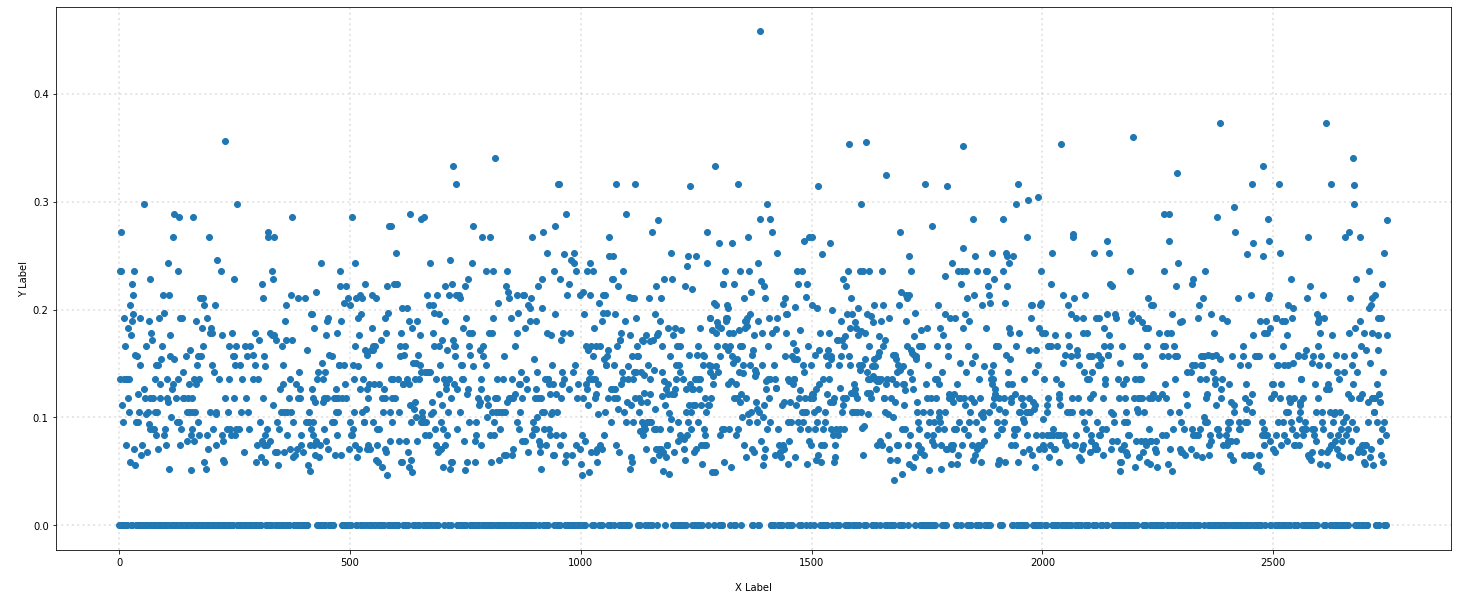

In [246]:
#the first word compare to other word
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
xs = range(0,len(X['text']))
ys = consine_array[0]
ax.scatter(xs, ys)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

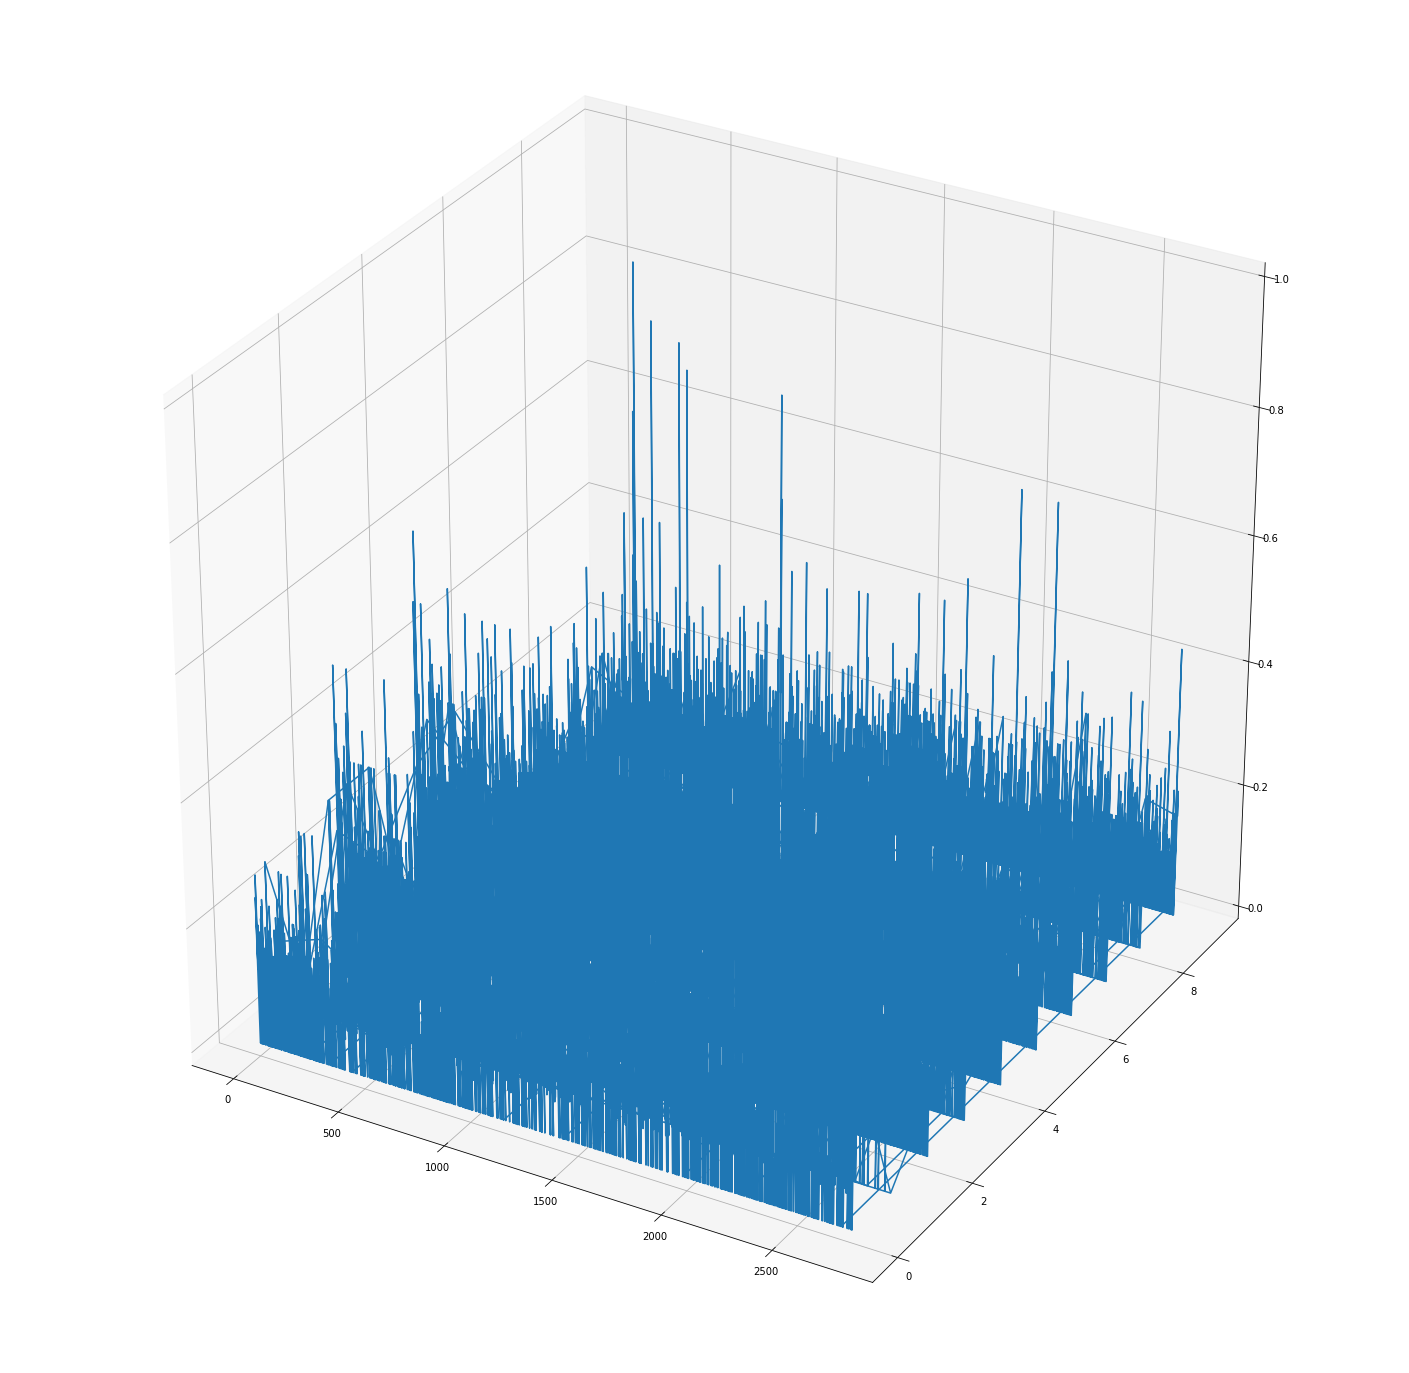

In [247]:
#the first ten words each compare to other word
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (25,25))


ax = fig.gca(projection='3d')

ax.set_zlim3d(0,1)
x = np.arange(0, 10, 1) # reprsent the first word till the last word
y = np.arange(0, len(X['text']), 1) # represent the first doc till the last
plotX, plotY = np.meshgrid(y, x)
plotZ = consine_array #the frequency of every word
surf = ax.plot_wireframe(plotX, plotY, plotZ)
plt.show()

# CLASSFILER

TF-IDF 

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

vectorizer = TfidfVectorizer()

def get_tf_idf_reduced_norm_data(corpus,norm_range=[0,1]):
  
  tf_idf = vectorizer.fit_transform(corpus)
  tf_idf_reduced = tf_idf.toarray()
  min_max_scaler = preprocessing.MinMaxScaler(norm_range)
  tf_idf_reduced = min_max_scaler.fit_transform(tf_idf_reduced)
  return tf_idf_reduced

In [249]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(X['text'])
tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [250]:
#get useful data
from sklearn.naive_bayes import MultinomialNB
XX = get_tf_idf_reduced_norm_data(X['text'])
YY = X['score']

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.25)

In [252]:
X_train,Y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 2548    0
 2298    1
 2383    1
 2738    0
 1605    0
        ..
 1292    1
 791     1
 1161    1
 2261    1
 1179    1
 Name: score, Length: 2061, dtype: int64)

In [253]:
#original Bernoulli naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8020378457059679

In [254]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer.fit_transform(corpus)
help(vectorizer)
#bnb.predict(get_tf_idf_reduced_norm_data(corpus))

Help on TfidfVectorizer in module sklearn.feature_extraction.text object:

class TfidfVectorizer(CountVectorizer)
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : str {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have a 'read' method (file-like
 |      object) that is called to fetch the bytes in memory.
 |  
 |      Otherwise the input is expected to be a sequence of items that
 |      can be of type string or byte.
 |  
 |  encoding : str, default='utf-8'
 |      If bytes or files are given to analyze, this encoding is used to
 |      decode.
 |  
 |

In [255]:
#Multinomial naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.7991266375545851

In [256]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.6695778748180495

In [257]:
# gnb.predict(get_tf_idf_reduced_norm_data(corpus))

frequency

In [258]:
X_counts.toarray().shape

(2748, 5155)

In [259]:
#counts_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())
min_max_scaler = preprocessing.MinMaxScaler()
counts_reduced_norm = min_max_scaler.fit_transform(X_counts.toarray())

In [260]:
XX = counts_reduced_norm
YY = X['score']
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.25)

In [261]:
X_train,Y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 1148    1
 1874    0
 1707    1
 2362    1
 1726    1
        ..
 656     0
 2660    0
 2183    0
 2507    0
 1679    1
 Name: score, Length: 2061, dtype: int64)

In [262]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8136826783114993

In [263]:
# bnb.predict(get_tf_idf_reduced_norm_data(corpus))

In [264]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.7787481804949054

In [265]:
# mnb.predict(get_tf_idf_reduced_norm_data(corpus))

In [266]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.6259097525473072

In [267]:
# gnb.predict(get_tf_idf_reduced_norm_data(corpus))

# Fourth

In [268]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [275]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

# term_frequencies = []
# for j in range(0,X_counts.shape[1]):
#     term_frequencies.append(sum(X_counts[:,j].toarray()))

#this for loop takes too much time
#use np.sum, add or the row and ouput an frequency array, really quick
term_frequencies = np.squeeze(np.asarray(np.sum(X_counts,axis=0)))
print(term_frequencies.shape)
term_frequencies

(5155,)


array([ 1, 38,  3, ...,  1,  2,  1], dtype=int64)